In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt
import pickle

In [19]:
# Reading the files.
cleaned_df = pd.read_csv("Resources//Data//homerent_cleaneddata_allzip.csv", index_col= "Date", parse_dates=True)

# Home_price.Newyork=np.ceil(Home_price.Newyork).astype(int)
# Dataframe  for rent data
df = cleaned_df
df

77449   77494   11385   77084   10467   11226   90250   60618  \
Date                                                                         
2015-03-31  1274.0  1583.0  2201.0  1216.0  1309.0  1863.0  1078.0  1304.0   
2015-04-30  1289.0  1578.0  2238.0  1213.0  1311.0  1921.0  1076.0  1321.0   
2015-05-31  1294.0  1583.0  2271.0  1214.0  1330.0  1927.0  1060.0  1323.0   
2015-06-30  1297.0  1581.0  2318.0  1222.0  1356.0  1929.0  1044.0  1354.0   
2015-07-31  1298.0  1582.0  2334.0  1215.0  1372.0  1904.0  1062.0  1359.0   
...            ...     ...     ...     ...     ...     ...     ...     ...   
2022-07-31  1799.0  1968.0  3005.0  1680.0  1920.0  2500.0  1877.0  1650.0   
2022-08-31  1835.0  1973.0  3063.0  1661.0  1994.0  2503.0  1905.0  1657.0   
2022-09-30  1836.0  1987.0  3064.0  1641.0  2051.0  2521.0  1898.0  1684.0   
2022-10-31  1823.0  1974.0  3071.0  1634.0  2012.0  2541.0  1912.0  1709.0   
2022-11-30  1795.0  1963.0  3073.0  1652.0  1993.0  2563.0  1858.0  1709.0   

             94565   11220  ...   32801   33316   10018   33897   15203  \
Date                        ...                                           
2015-03-31  1590.0  1645.0  ...  1372.0  1637.0  3586.0  1110.0  1309.0   
2015-04-30  1606.0  1716.0  ...  1372.0  1665.0  3504.0  1122.0  1335.0   
2015-05-31  1590.0  1727.0  ...  1358.0  1662.0  3482.0  1128.0  1339.0   
2015-06-30  1626.0  1790.0  ...  1360.0  1628.0  3516.0  1150.0  1330.0   
2015-07-31  1648.0  1792.0  ...  1345.0  1615.0  3553.0  1152.0  1360.0   
...            ...     ...  ...     ...     ...     ...     ...     ...   
2022-07-31  2746.0  2180.0  ...  2037.0  2629.0  4406.0  1981.0  1527.0   
2022-08-31  2691.0  2210.0  ...  2024.0  2711.0  4379.0  2014.0  1544.0   
2022-09-30  2726.0  2294.0  ...  2044.0  2744.0  4364.0  2145.0  1547.0   
2022-10-31  2740.0  2337.0  ...  2063.0  2820.0  4322.0  2187.0  1593.0   
2022-11-30  2769.0  2313.0  ...  2071.0  2814.0  4354.0  2190.0  1608.0   

              2111    2113   19127   10006   11109  
Date                                                
2015-03-31  3081.0  2032.0  1591.0  3133.0  2715.0  
2015-04-30  3215.0  2026.0  1573.0  3129.0  2812.0  
2015-05-31  3279.0  2030.0  1618.0  3118.0  2880.0  
2015-06-30  3173.0  2045.0  1619.0  3154.0  2887.0  
2015-07-31  3120.0  2069.0  1645.0  3210.0  2852.0  
...            ...     ...     ...     ...     ...  
2022-07-31  3719.0  2499.0  2046.0  3956.0  3947.0  
2022-08-31  3769.0  2564.0  2084.0  3937.0  3956.0  
2022-09-30  3829.0  2678.0  2073.0  3897.0  4009.0  
2022-10-31  3946.0  2713.0  2044.0  3991.0  4021.0  
2022-11-30  3954.0  2626.0  2047.0  4032.0  4055.0  

[93 rows x 919 columns]

## Auto Training for multiple Zip codes.


In [21]:
# List_Zip = ["77449","77494","11385","77084","11109"]
#list_zip = df.columns

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=700.102, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=700.597, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=700.231, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=687.874, Time=0.03 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=687.982, Time=0.05 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=689.246, Time=0.05 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=691.598, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=702.590, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec

Best model:  ARIMA(1,2,1)(0,0,0)[0]          
Total fit time: 0.421 seconds
 For Zipcode 77449 RMSE Score is 111
Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=678.526, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=717.578, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]     

 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=653.891, Time=0.07 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=655.584, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=655.307, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=655.123, Time=0.08 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=657.288, Time=0.12 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=660.632, Time=0.03 sec

Best model:  ARIMA(3,1,0)(0,0,0)[0] intercept
Total fit time: 0.822 seconds
 For Zipcode 60618 RMSE Score is 109
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=837.314, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=867.320, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=869.180, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=869.208, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=884.798, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=835.807, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=850.392, Time=0.08 se

 ARIMA(4,2,1)(0,0,0)[0]             : AIC=703.932, Time=0.11 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=707.303, Time=0.04 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=706.485, Time=0.10 sec
 ARIMA(4,2,2)(0,0,0)[0]             : AIC=705.927, Time=0.14 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=709.109, Time=0.04 sec
 ARIMA(5,2,2)(0,0,0)[0]             : AIC=inf, Time=0.22 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec

Best model:  ARIMA(4,2,1)(0,0,0)[0]          
Total fit time: 1.216 seconds
 For Zipcode 30044 RMSE Score is 63
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=805.676, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=909.948, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=811.872, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=865.397, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=912.354, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=810.014, Time=0.07 sec
 ARIMA(

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=829.076, Time=0.05 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=814.482, Time=0.08 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=814.382, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=824.069, Time=0.05 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=812.442, Time=0.05 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=813.461, Time=0.07 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=814.044, Time=0.13 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=813.244, Time=0.17 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=814.415, Time=0.04 sec

Best model:  ARIMA(4,1,0)(0,0,0)[0] intercept
Total fit time: 1.664 seconds
 For Zipcode 77429 RMSE Score is 

 ARIMA(1,2,2)(0,0,0)[0]             : AIC=677.497, Time=0.04 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=675.310, Time=0.06 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=660.828, Time=0.09 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=662.406, Time=0.05 sec
 ARIMA(4,2,2)(0,0,0)[0]             : AIC=inf, Time=0.20 sec
 ARIMA(3,2,3)(0,0,0)[0]             : AIC=655.999, Time=0.11 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=654.124, Time=0.11 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=652.559, Time=0.06 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(1,2,4)(0,0,0)[0]             : AIC=654.089, Time=0.08 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=676.963, Time=0.03 sec
 ARIMA(0,2,4)(0,0,0)[0]             : AIC=657.344, Time=0.07 sec
 ARIMA(2,2,4)(0,0,0)[0]             : AIC=656.088, Time=0.20 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec

Best model:  ARIMA(1,2,3)(0,0,0)[0]          
Total fit time: 1.475 seconds
 For Zipcode 77379 RMSE S

 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=877.565, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=877.256, Time=0.02 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 0.450 seconds
 For Zipcode 11230 RMSE Score is 215
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=784.482, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=764.395, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=773.299, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=811.947, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=764.308, Time=0.05 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=754.437, Time=0.06 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=749.065, Time=0.09 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=746.428, Time=0.11 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=748.424, Time=0.17 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=748.646, Time=0.12 sec
 A

 ARIMA(1,2,2)(0,0,0)[0]             : AIC=602.750, Time=0.04 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=602.876, Time=0.06 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=593.884, Time=0.07 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=592.883, Time=0.05 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=595.166, Time=0.03 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=593.638, Time=0.09 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=606.884, Time=0.02 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=595.338, Time=0.03 sec
 ARIMA(4,2,2)(0,0,0)[0]             : AIC=595.524, Time=0.18 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=594.817, Time=0.08 sec

Best model:  ARIMA(3,2,1)(0,0,0)[0]          
Total fit time: 0.745 seconds
 For Zipcode 28269 RMSE Score is 86
Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=673.527, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=659.925, Time=0.02 sec
 AR

 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=851.297, Time=0.09 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=853.259, Time=0.10 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=853.282, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=856.413, Time=0.10 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=853.094, Time=0.24 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=852.393, Time=0.04 sec

Best model:  ARIMA(4,1,0)(0,0,0)[0] intercept
Total fit time: 1.061 seconds
 For Zipcode 96706 RMSE Score is 227
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=735.253, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=718.964, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=726.939, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=750.979, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=713.912, Time=0.04 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=708.925, Time=0.05 sec
 A

 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=802.495, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=816.141, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=801.209, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=801.220, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=800.366, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=800.373, Time=0.02 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 0.451 seconds
 For Zipcode 11375 RMSE Score is 180
Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=795.992, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=808.272, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=808.042, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=805.836, Time=0.02 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=793.790, Time=0.05 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=795.853, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=792.566, Time=0.04 se

 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=757.974, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=771.596, Time=0.05 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=754.559, Time=0.14 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=753.945, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=770.338, Time=0.09 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=754.130, Time=0.05 sec

Best model:  ARIMA(1,1,2)(0,0,0)[0] intercept
Total fit time: 1.005 seconds
 For Zipcode 20906 RMSE Score is 256
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=874.635, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=876.073, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=875.978, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=876.254, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec

Best mode

 For Zipcode 60657 RMSE Score is 150
Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.16 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=786.609, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=777.630, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=774.426, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=775.325, Time=0.04 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=773.170, Time=0.03 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=773.108, Time=0.08 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=739.318, Time=0.11 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=743.105, Time=0.19 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=740.935, Time=0.27 sec
 ARIMA(1,2,4)(0,0,0)[0]             : AIC=inf, Time=0.31 sec
 ARIMA(0,2,4)(0,0,0)[0]             : AIC=737.684, Time=0.11 sec
 ARIMA(0,2,5)(0,0,0)[0]             : AIC=inf, Time=0.28 sec
 ARIMA(1,2,5)(0,0,0)[0]             : AIC=inf, Time=0.20 sec
 ARIMA(0,2,4)(0,0,0)[0] in

 For Zipcode 85225 RMSE Score is 151
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=718.659, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=774.494, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=750.258, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=762.894, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=804.177, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=718.595, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=720.988, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=748.044, Time=0.05 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=724.710, Time=0.15 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=720.342, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=740.123, Time=0.09 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=717.920, Time=0.15 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=719.461, Time=0.23 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=719.636, Time=0.22 sec
 ARIMA(1,1

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=850.805, Time=0.11 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=843.073, Time=0.13 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=845.029, Time=0.10 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=841.352, Time=0.21 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=843.288, Time=0.23 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=841.612, Time=0.24 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(2,1,3)(0,0,0)[0]             : AIC=843.876, Time=0.14 sec

Best model:  ARIMA(2,1,3)(0,0,0)[0] intercept
Total fit time: 2.248 seconds
 For Zipcode 20002 RMSE Score is 374
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=614.380, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=640.822, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=629.865, Time=0.04 sec
 ARIMA(0,1

 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=714.595, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=725.657, Time=0.05 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=714.320, Time=0.20 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=712.562, Time=0.10 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=713.138, Time=0.15 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=709.479, Time=0.28 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=710.839, Time=0.23 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=709.773, Time=0.23 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=708.041, Time=0.22 sec
 ARIMA(0,1,5)(0,0,0)[0]             : AIC=712.773, Time=0.14 sec

Best model:  ARIMA(0,1,5)(0,0,0)[0] intercept
Total fit time: 2.081 seconds
 For Zipcode 85204 RMSE Score is 247
Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=787.799, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=841.483, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=806.763, Time=0.02 se

 For Zipcode 11209 RMSE Score is 108
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=774.738, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=813.486, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=807.146, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=810.431, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=832.136, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=773.375, Time=0.21 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=783.589, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=807.402, Time=0.13 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=774.893, Time=0.30 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=777.882, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=797.492, Time=0.12 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=776.721, Time=0.29 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=782.794, Time=0.08 sec

Best model:  ARIMA(1,1,2)(0,0,0)[0] intercept
Total fit time: 1.762 second

 ARIMA(0,1,2)(0,0,0)[0]             : AIC=753.249, Time=0.05 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 0.783 seconds
 For Zipcode 30004 RMSE Score is 320
Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=664.955, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=671.730, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=670.250, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=670.091, Time=0.02 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=664.001, Time=0.07 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=671.289, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=671.473, Time=0.03 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=649.253, Time=0.08 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=650.715, Time=0.04 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=650.848, Time=0.08 sec
 ARIMA(1,2,4)(0,0,0)[0]             : AIC=651.115, Time=0.09 sec
 ARIMA(0,2,4)(0,0,0)[0]             : AIC=649.289, Time=0.08 se

 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=743.817, Time=0.11 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=744.714, Time=0.16 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=746.589, Time=0.04 sec

Best model:  ARIMA(4,1,0)(0,0,0)[0] intercept
Total fit time: 0.937 seconds
 For Zipcode 80134 RMSE Score is 205
Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=731.879, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=760.955, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=731.256, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=730.580, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=731.696, Time=0.04 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=732.057, Time=0.03 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=731.651, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=732.580, Time=0.03 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 0.269 seconds
 For Zipcode 32828 RMSE Score is 358
Performing ste

 ARIMA(3,1,2)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(2,1,3)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=854.768, Time=0.03 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=831.280, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=842.632, Time=0.06 sec
 ARIMA(3,1,3)(0,0,0)[0]             : AIC=inf, Time=0.14 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0]          
Total fit time: 2.070 seconds
 For Zipcode 10023 RMSE Score is 902
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=786.006, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=782.553, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=782.930, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=801.983, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=784.214, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=784.458, Time=0.06 sec
 ARIMA(2,1,1)(

 ARIMA(2,2,5)(0,0,0)[0]             : AIC=723.141, Time=0.25 sec
 ARIMA(1,2,5)(0,0,0)[0]             : AIC=724.253, Time=0.16 sec
 ARIMA(3,2,3)(0,0,0)[0]             : AIC=726.710, Time=0.13 sec
 ARIMA(3,2,5)(0,0,0)[0]             : AIC=730.147, Time=0.31 sec
 ARIMA(2,2,4)(0,0,0)[0] intercept   : AIC=721.906, Time=0.29 sec

Best model:  ARIMA(2,2,4)(0,0,0)[0]          
Total fit time: 2.618 seconds
 For Zipcode 29445 RMSE Score is 91
Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=771.255, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=793.276, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=788.173, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=775.875, Time=0.02 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=770.129, Time=0.05 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=769.563, Time=0.04 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=756.880, Time=0.07 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=756.047, Time=0.09 sec

 ARIMA(2,2,1)(0,0,0)[0]             : AIC=789.203, Time=0.07 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=768.379, Time=0.09 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=768.149, Time=0.09 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=775.736, Time=0.04 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=767.896, Time=0.12 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=775.337, Time=0.05 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=769.767, Time=0.14 sec
 ARIMA(4,2,2)(0,0,0)[0]             : AIC=769.868, Time=0.16 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=777.259, Time=0.06 sec
 ARIMA(5,2,2)(0,0,0)[0]             : AIC=771.204, Time=0.16 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec

Best model:  ARIMA(4,2,1)(0,0,0)[0]          
Total fit time: 1.399 seconds
 For Zipcode 85041 RMSE Score is 87
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=810.969, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=844.626, Time=0.01 sec
 AR

 For Zipcode 90731 RMSE Score is 192
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=711.371, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=747.966, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=747.144, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=748.002, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=763.744, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=709.495, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=722.196, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=748.667, Time=0.08 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=738.065, Time=0.11 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=711.386, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=714.667, Time=0.08 sec

Best model:  ARIMA(1,1,2)(0,0,0)[0] intercept
Total fit time: 1.375 seconds
 For Z

 ARIMA(3,2,4)(0,0,0)[0]             : AIC=inf, Time=0.26 sec
 ARIMA(2,2,4)(0,0,0)[0]             : AIC=inf, Time=0.26 sec
 ARIMA(4,2,2)(0,0,0)[0]             : AIC=inf, Time=0.22 sec
 ARIMA(4,2,4)(0,0,0)[0]             : AIC=inf, Time=0.29 sec
 ARIMA(3,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec

Best model:  ARIMA(3,2,3)(0,0,0)[0]          
Total fit time: 2.669 seconds
 For Zipcode 33027 RMSE Score is 554
Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=669.851, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=733.833, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=690.210, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=683.648, Time=0.02 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=679.096, Time=0.04 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=680.311, Time=0.04 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=663.014, Time=0.07 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=662.996, Time=0.07 sec
 ARIMA(3,2,0)(0,0,

 For Zipcode 85008 RMSE Score is 242
Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.18 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=790.587, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=788.344, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=774.894, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=764.717, Time=0.04 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=764.541, Time=0.07 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=790.342, Time=0.25 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=742.322, Time=0.09 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=757.638, Time=0.03 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=742.971, Time=0.08 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=743.162, Time=0.09 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=754.220, Time=0.05 sec
 ARIMA(4,2,2)(0,0,0)[0]             : AIC=744.968, Time=0.17 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec

Best model:  ARIM

 ARIMA(4,2,1)(0,0,0)[0]             : AIC=697.795, Time=0.08 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=724.607, Time=0.03 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=703.867, Time=0.04 sec
 ARIMA(4,2,2)(0,0,0)[0]             : AIC=699.792, Time=0.11 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=697.877, Time=0.09 sec

Best model:  ARIMA(3,2,1)(0,0,0)[0]          
Total fit time: 0.764 seconds
 For Zipcode 77375 RMSE Score is 188
Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=690.143, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=751.823, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=712.227, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=694.074, Time=0.03 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=692.567, Time=0.05 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=695.227, Time=0.05 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=677.485, Time=0.07 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=675.590, Time=0.06 se

 ARIMA(5,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec

Best model:  ARIMA(5,2,3)(0,0,0)[0]          
Total fit time: 2.432 seconds
 For Zipcode 83646 RMSE Score is 254
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=907.864, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=934.503, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=911.652, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=921.315, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=934.856, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=909.922, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=906.410, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=910.497, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=908.216, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=907.666, Time=0.16 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=908.415, Time=0.09 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=909.572, Time=0.22 sec
 A

 ARIMA(1,2,3)(0,0,0)[0]             : AIC=747.987, Time=0.08 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=inf, Time=0.17 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=743.796, Time=0.12 sec
 ARIMA(3,2,3)(0,0,0)[0]             : AIC=717.135, Time=0.12 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=733.444, Time=0.06 sec
 ARIMA(4,2,3)(0,0,0)[0]             : AIC=718.995, Time=0.15 sec
 ARIMA(3,2,4)(0,0,0)[0]             : AIC=718.905, Time=0.19 sec
 ARIMA(2,2,4)(0,0,0)[0]             : AIC=731.766, Time=0.20 sec
 ARIMA(4,2,2)(0,0,0)[0]             : AIC=733.287, Time=0.13 sec
 ARIMA(4,2,4)(0,0,0)[0]             : AIC=720.831, Time=0.24 sec
 ARIMA(3,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec

Best model:  ARIMA(3,2,3)(0,0,0)[0]          
Total fit time: 2.033 seconds
 For Zipcode 30331 RMSE Score is 44
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=774.512, Time=0.02 sec
 ARIMA(1,1,

LinAlgError: LU decomposition error.

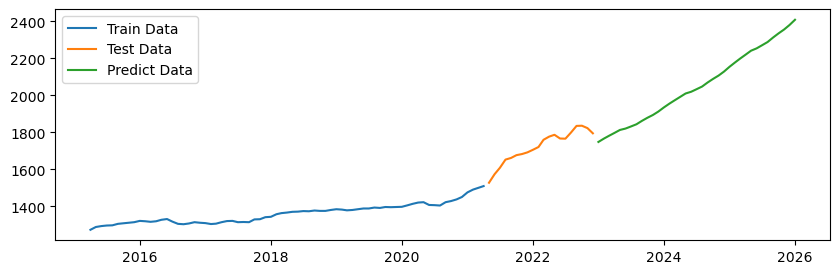

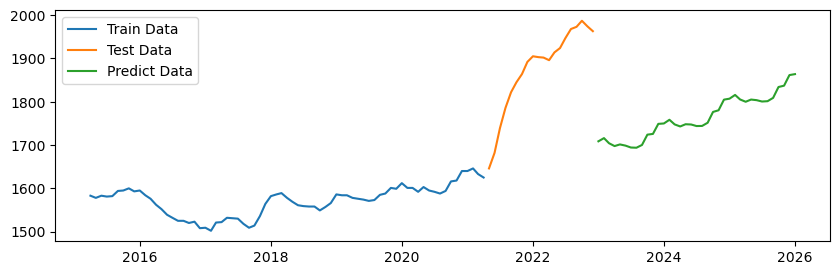

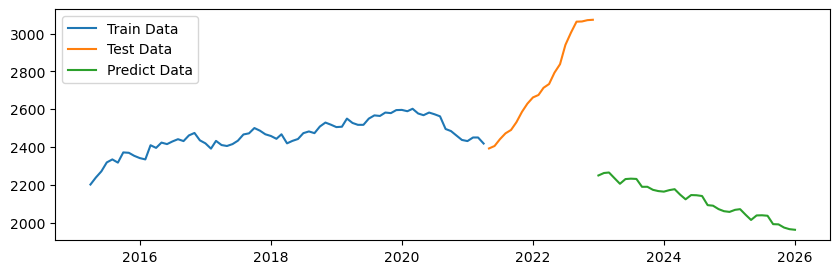

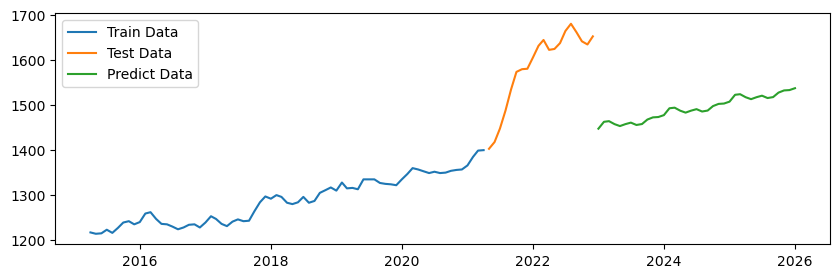

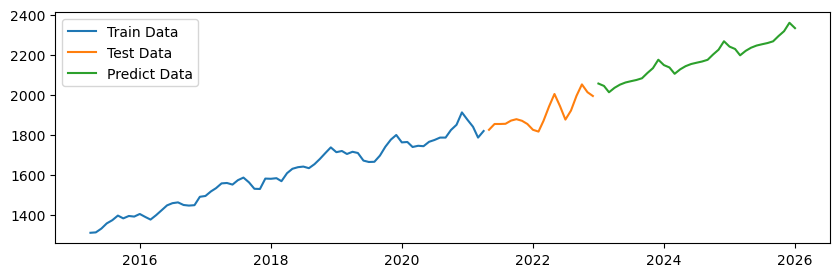

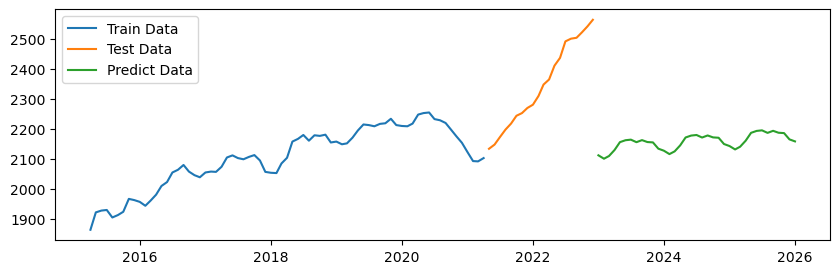

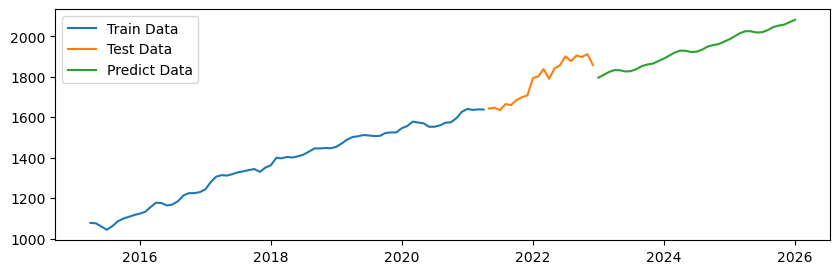

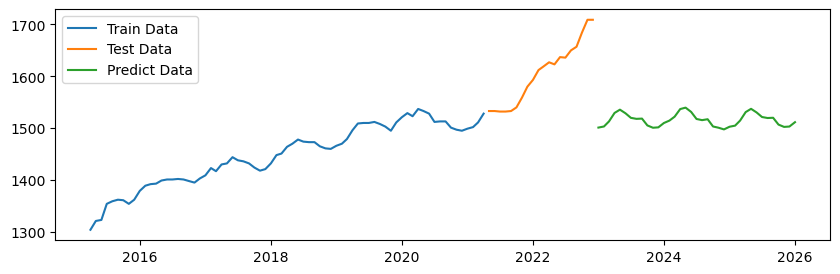

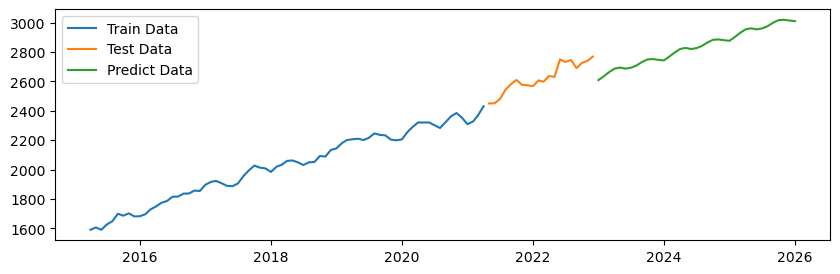

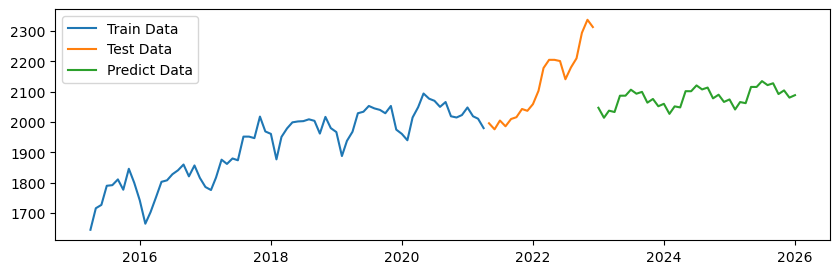

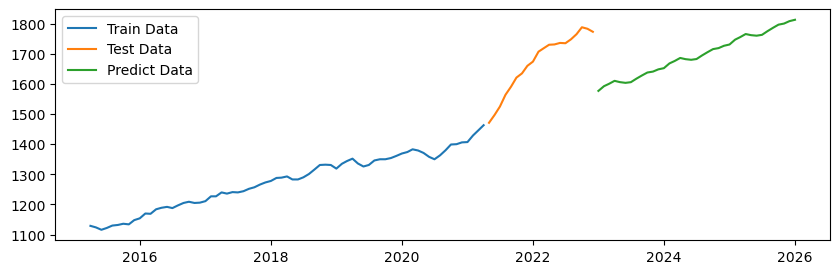

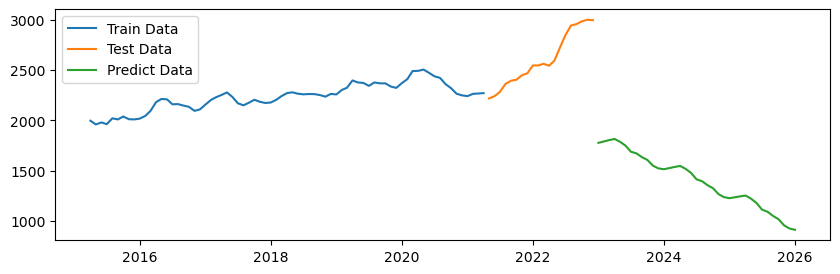

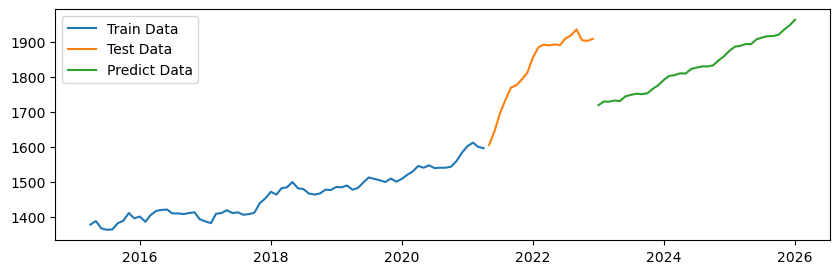

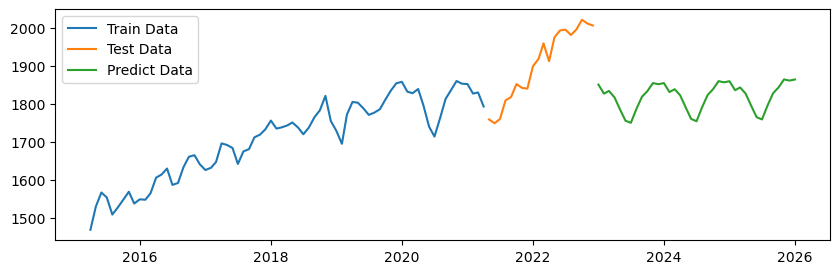

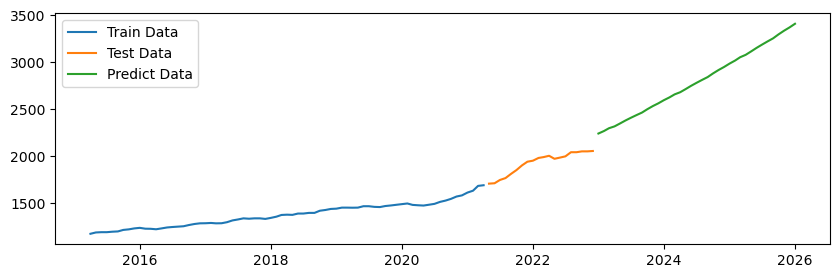

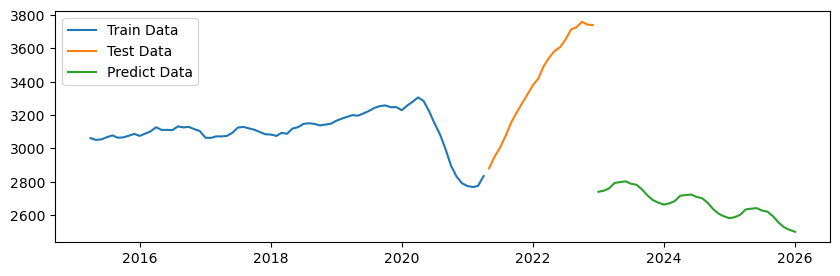

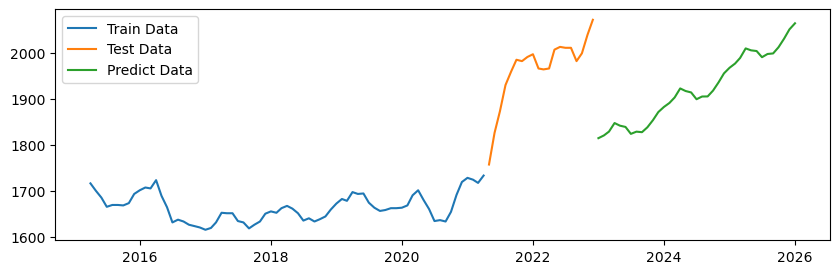

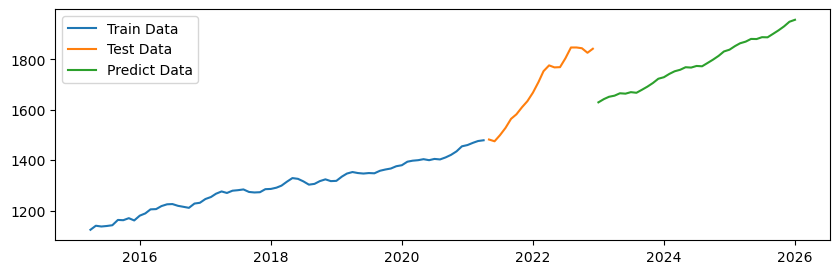

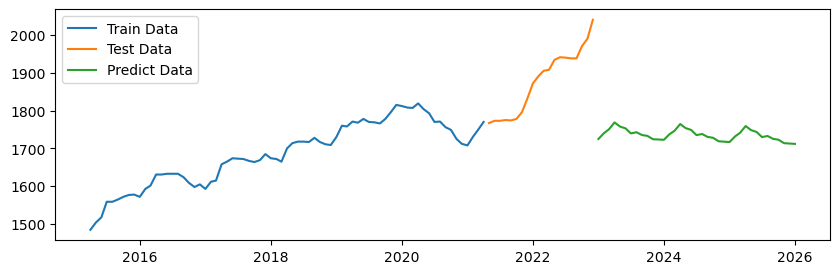

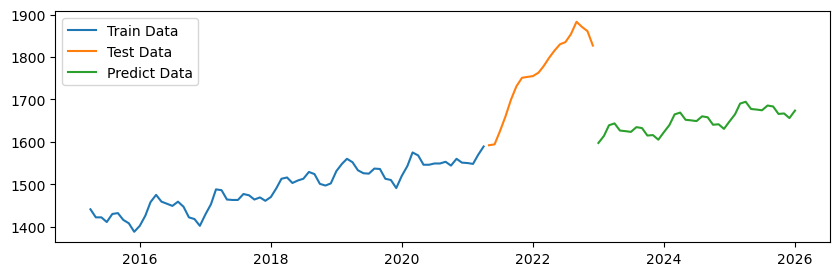

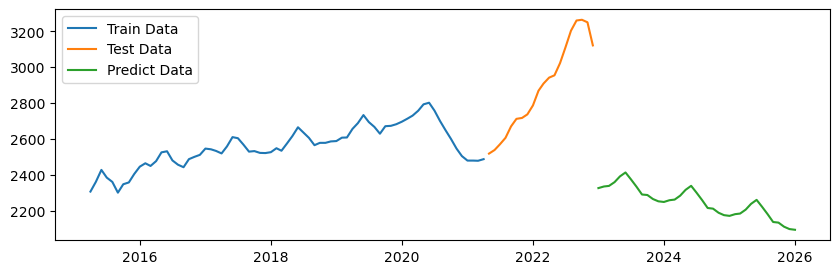

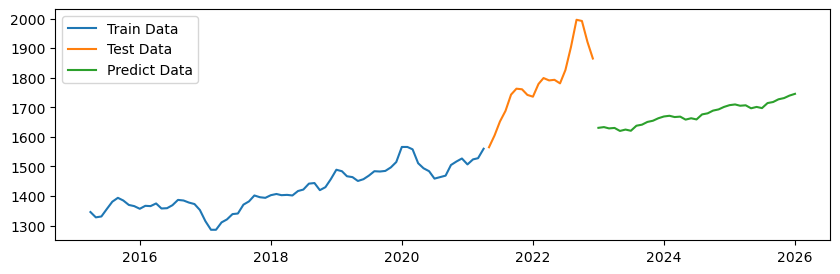

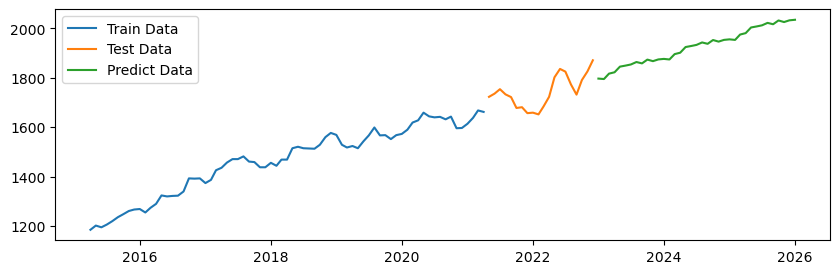

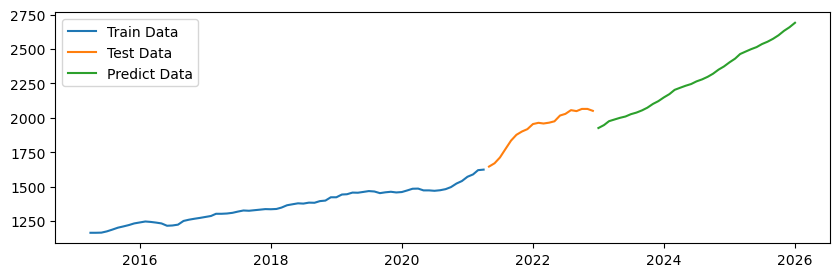

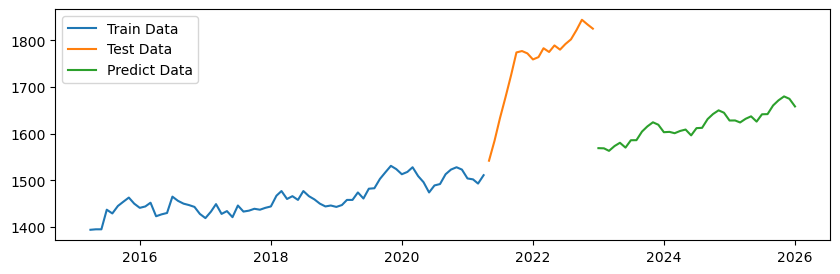

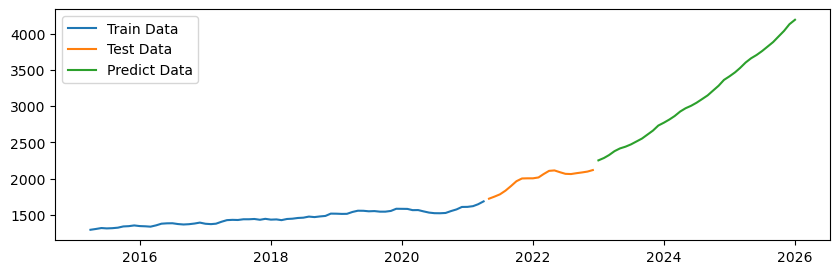

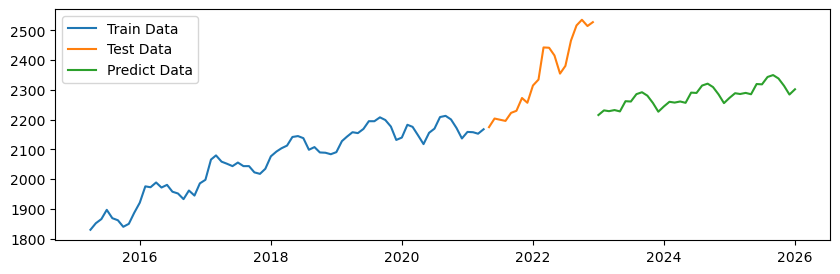

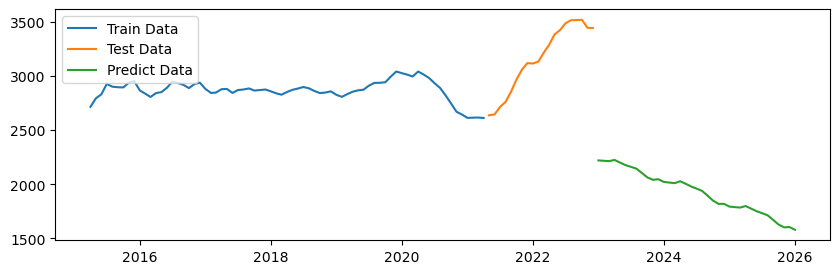

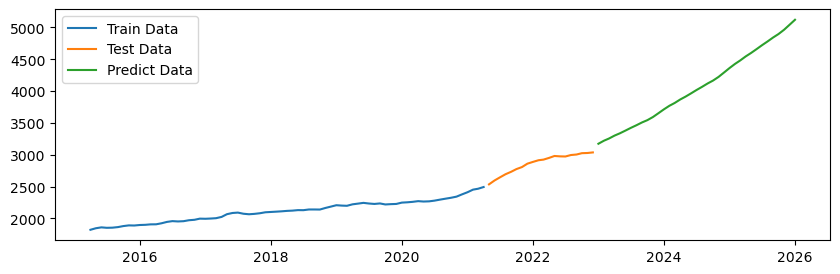

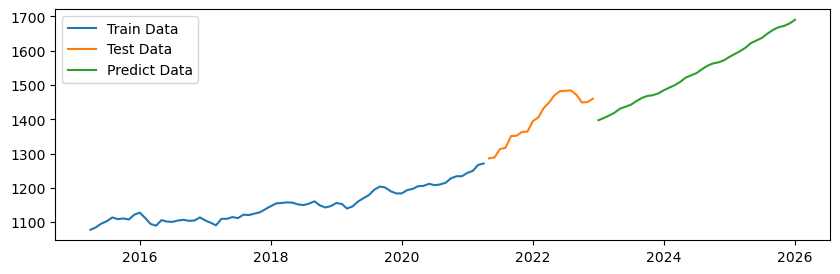

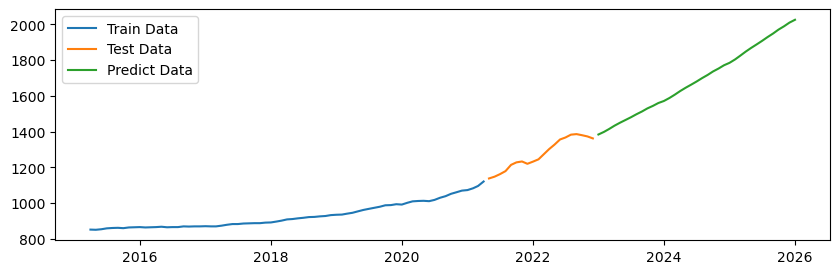

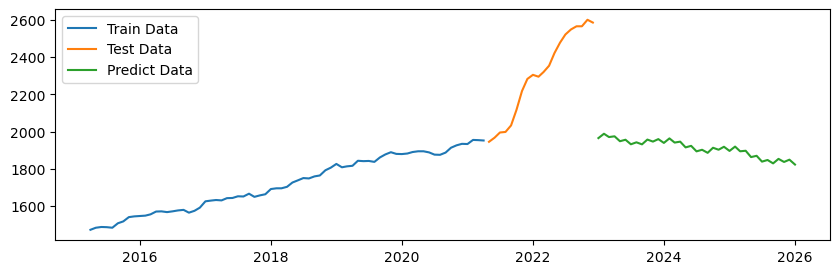

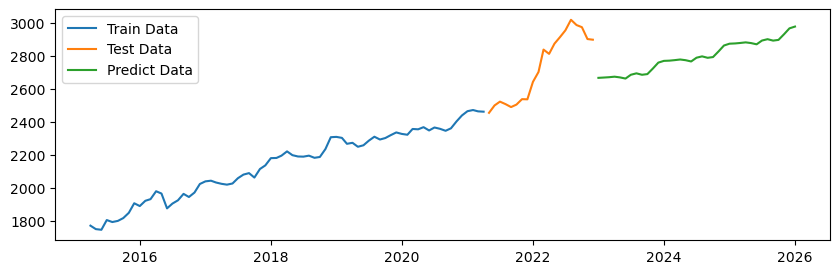

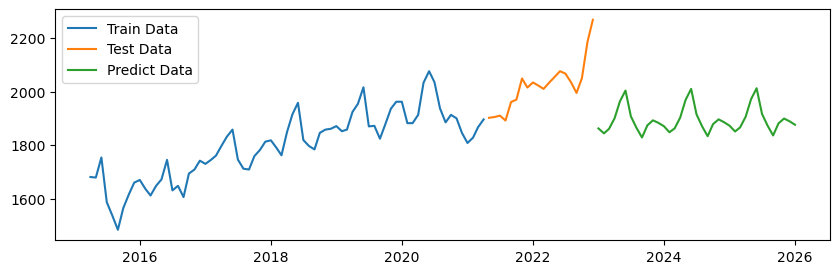

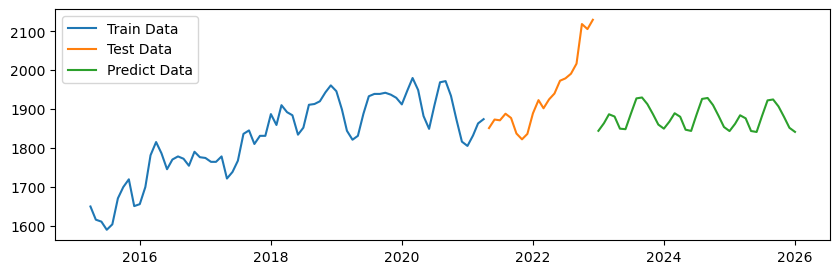

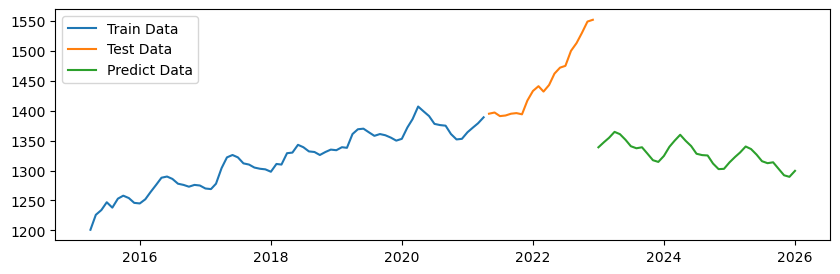

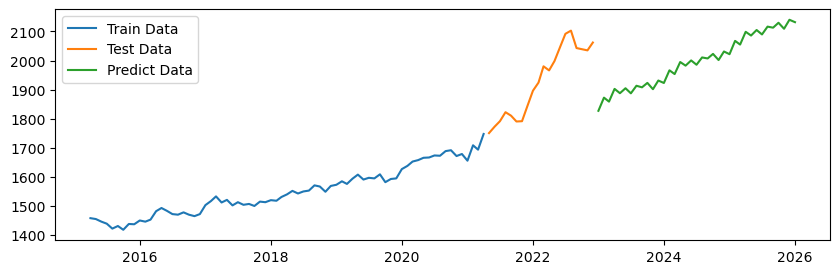

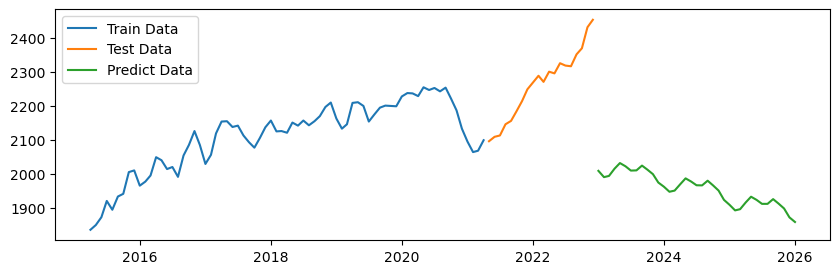

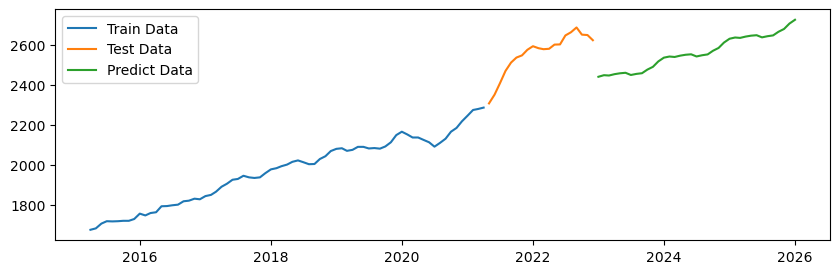

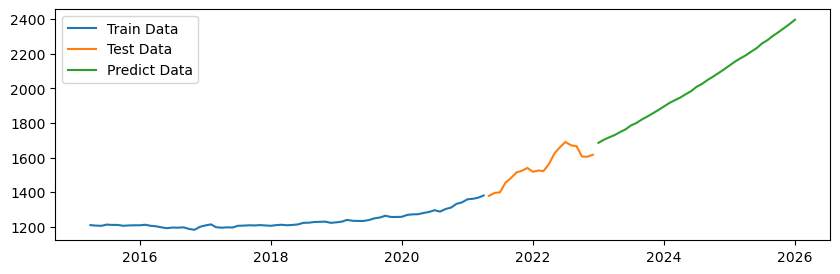

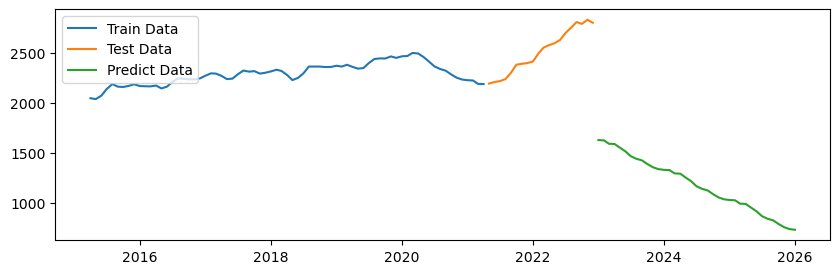

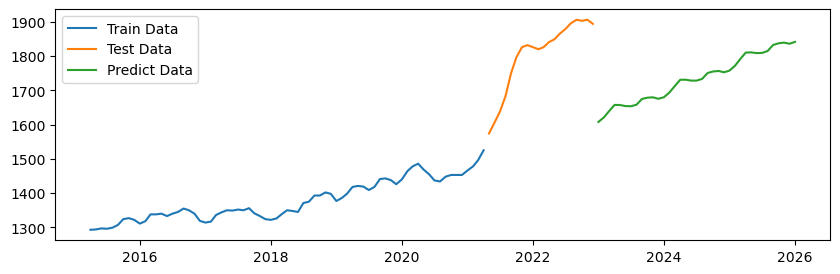

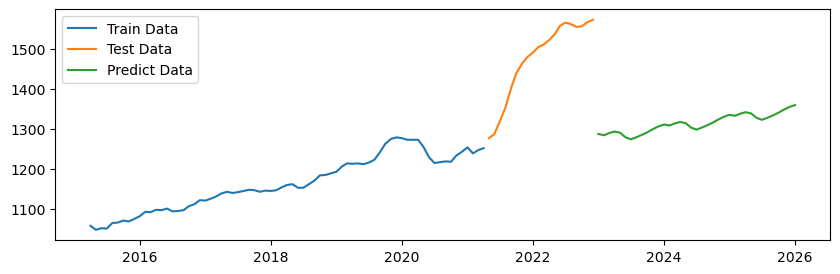

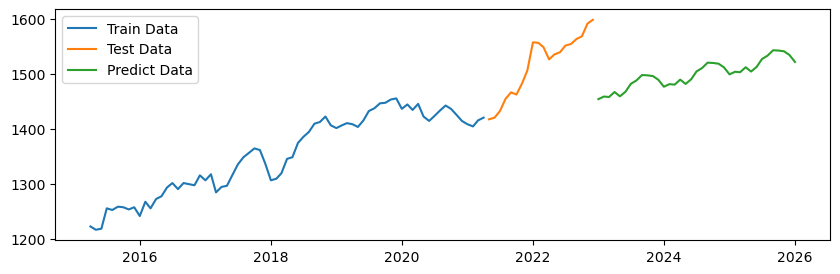

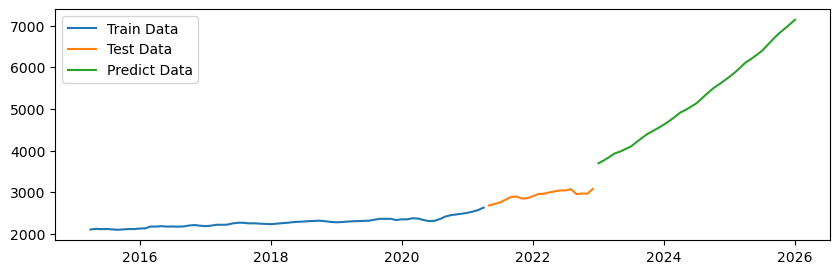

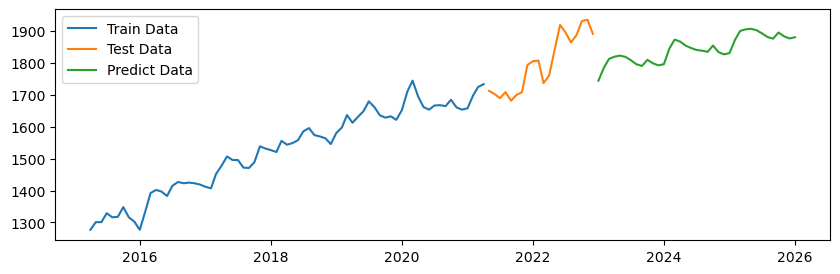

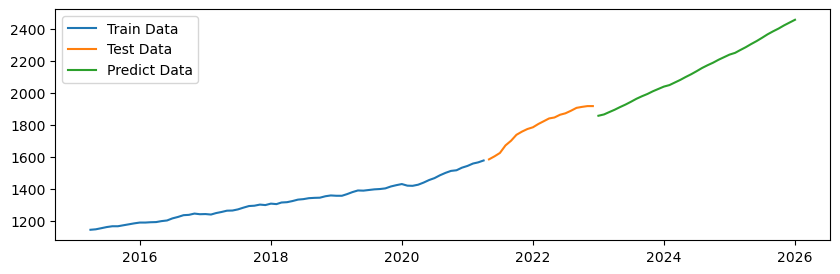

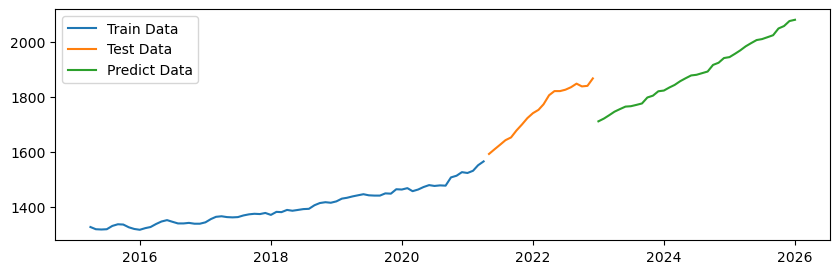

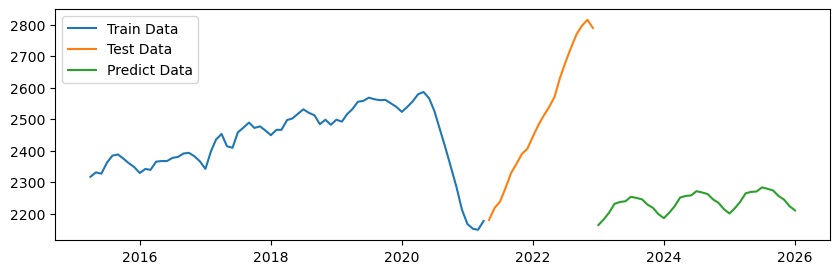

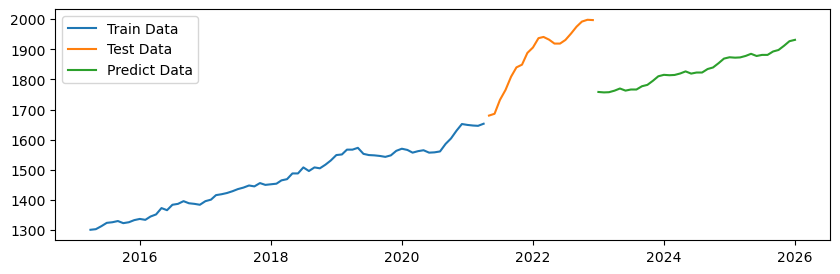

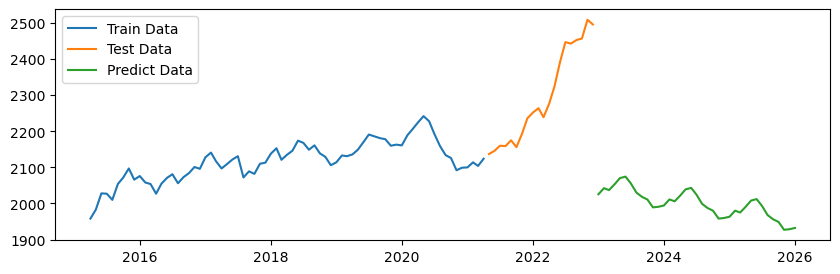

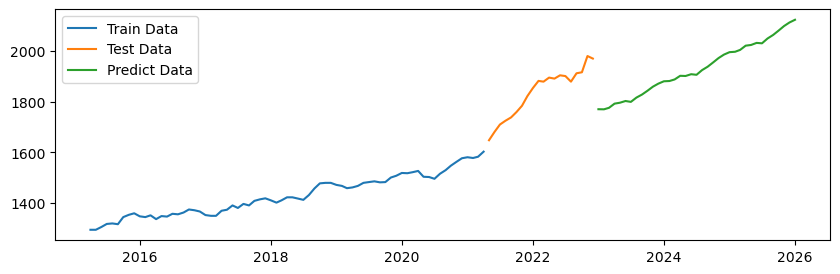

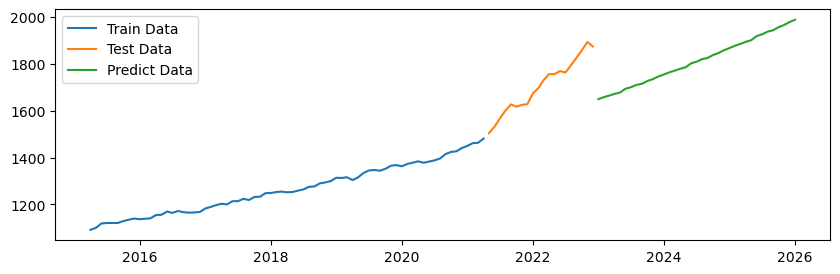

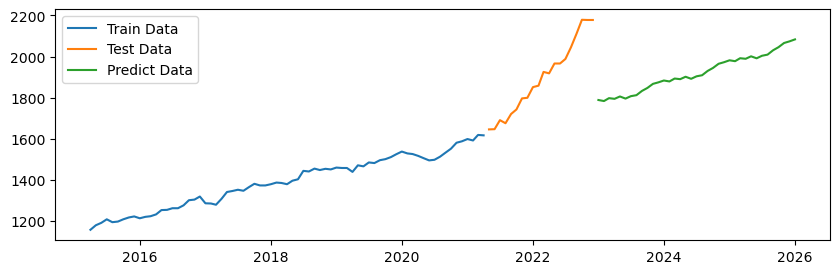

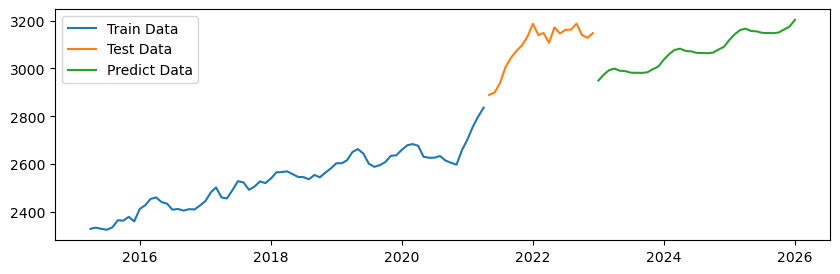

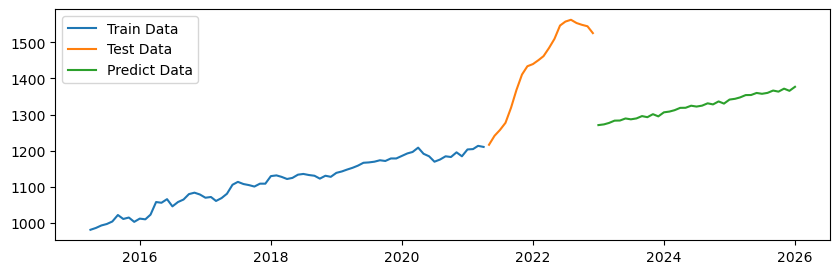

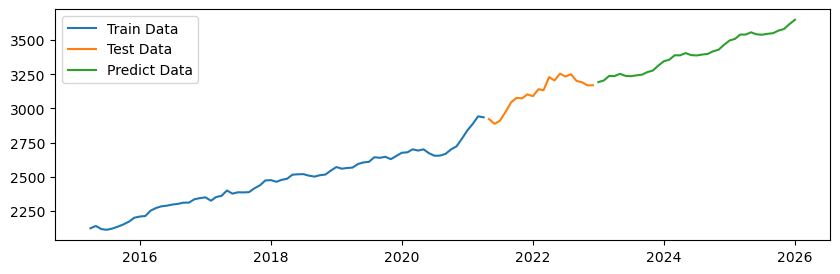

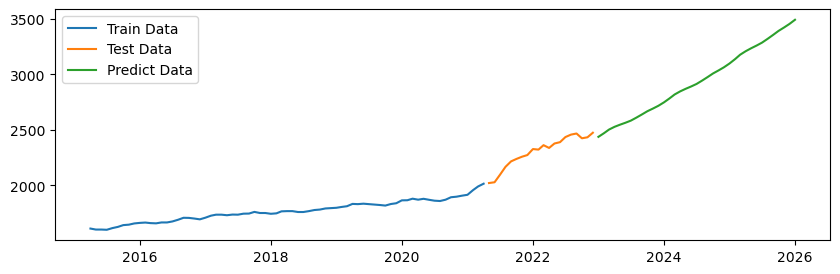

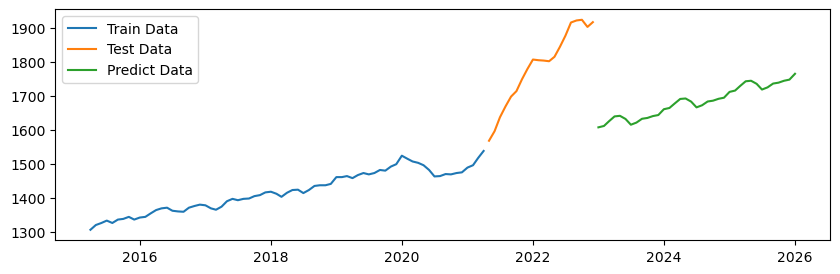

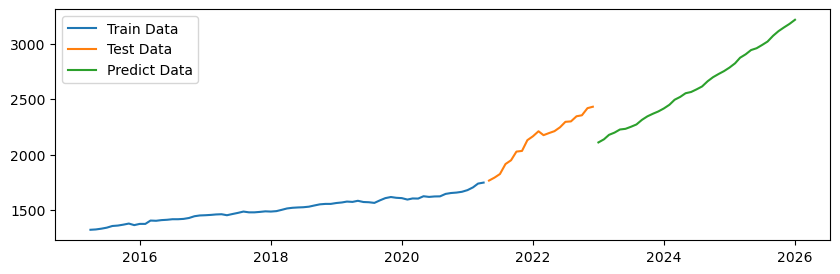

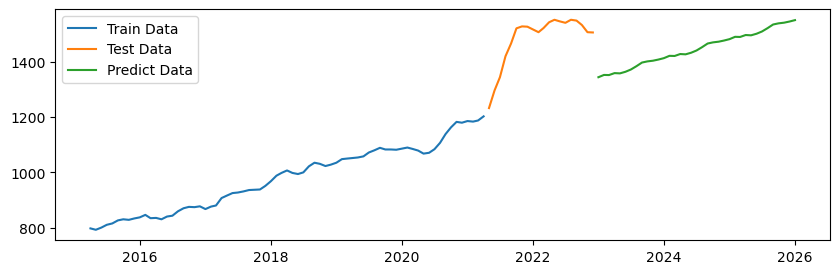

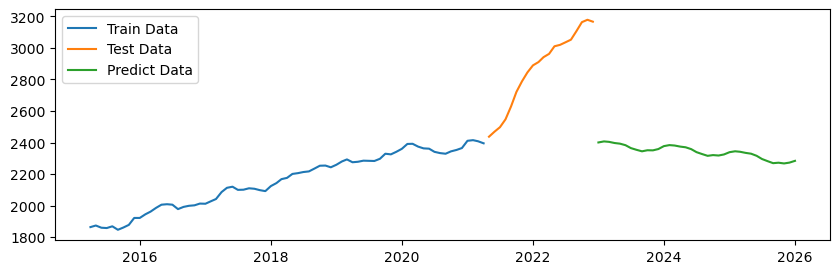

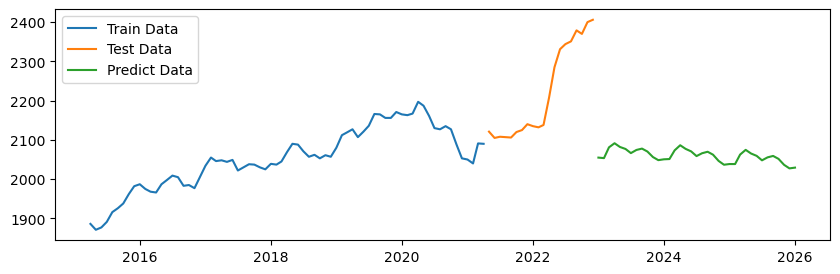

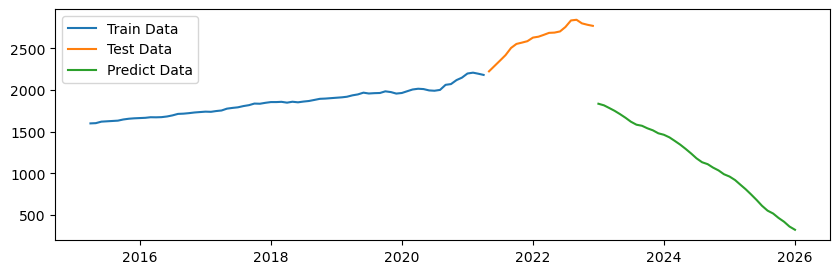

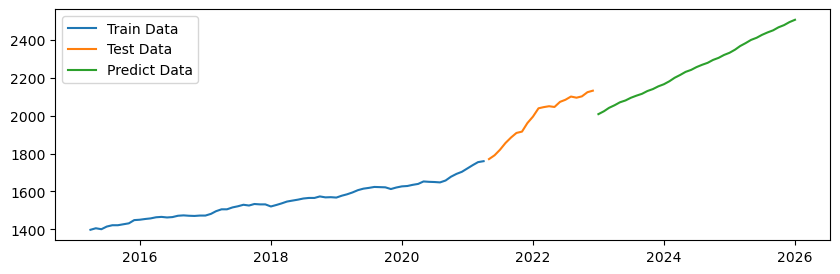

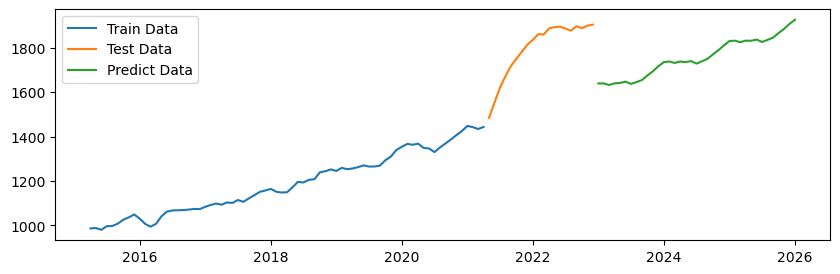

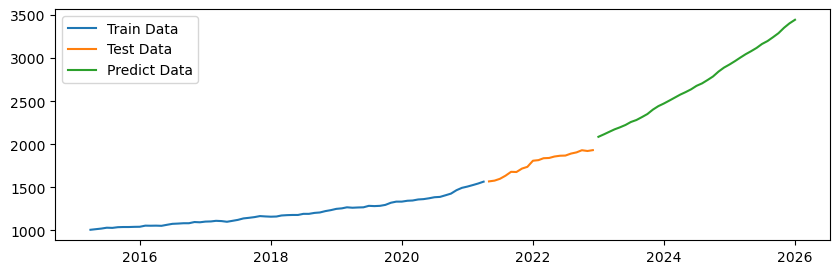

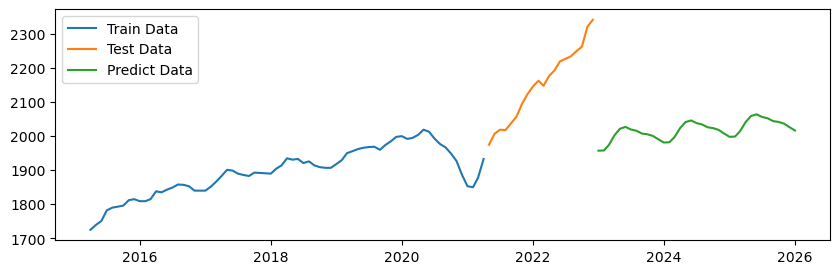

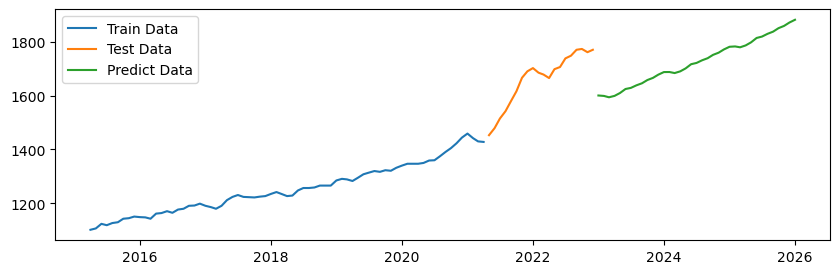

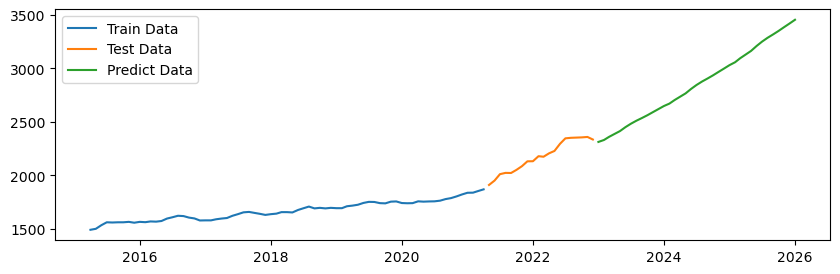

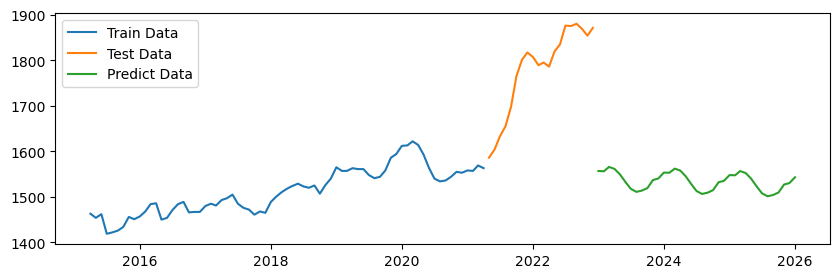

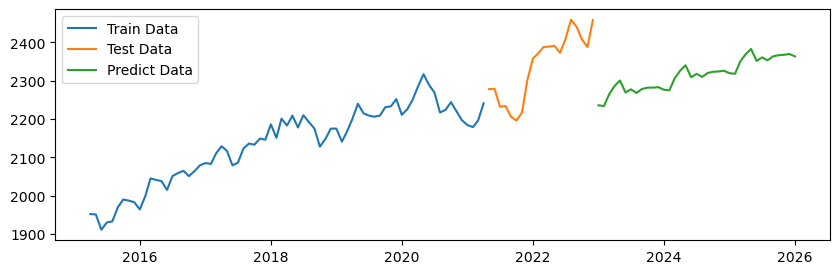

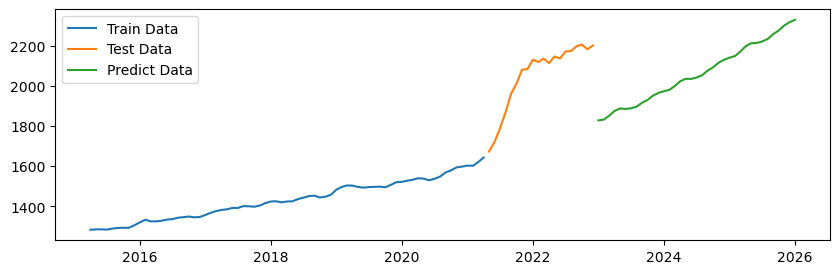

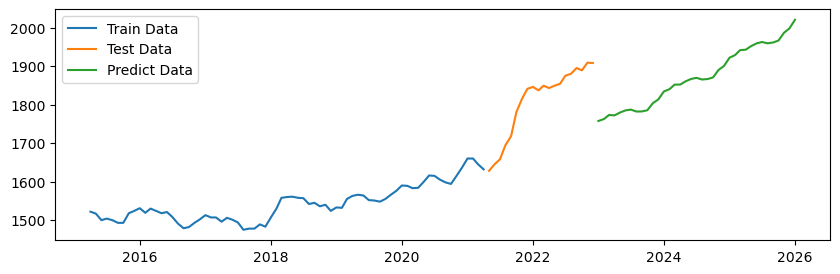

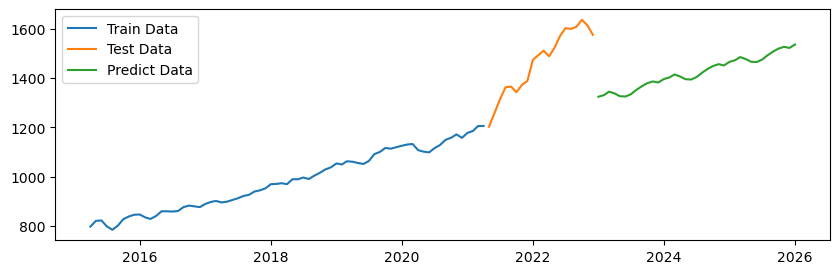

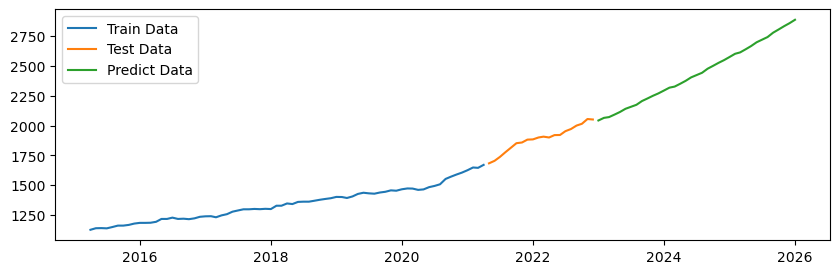

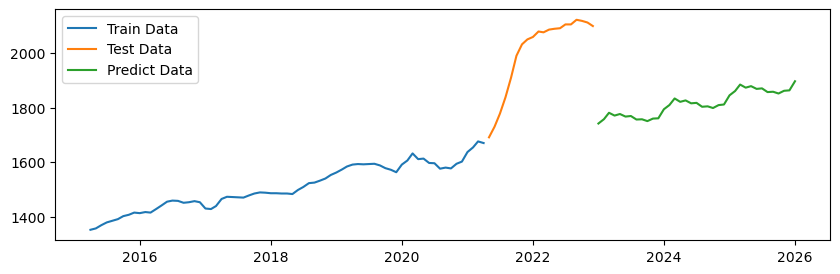

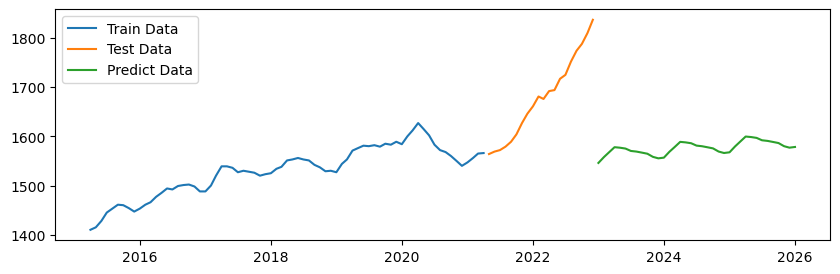

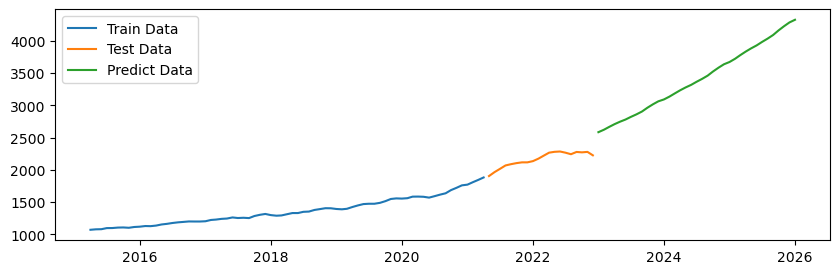

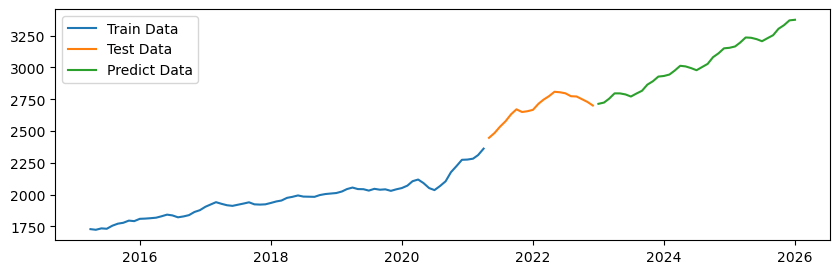

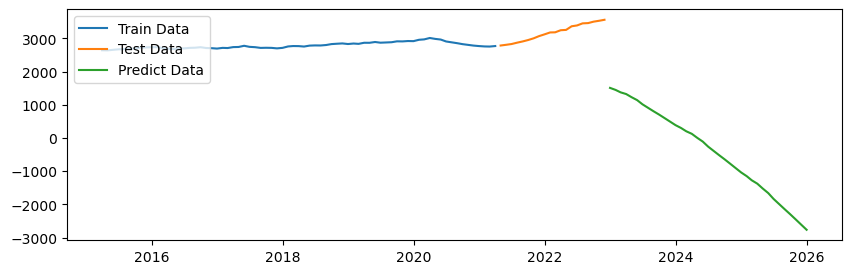

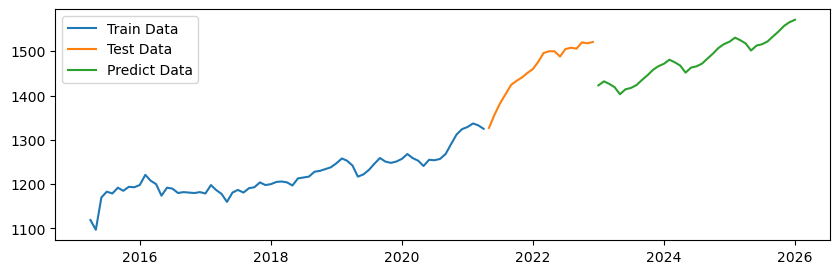

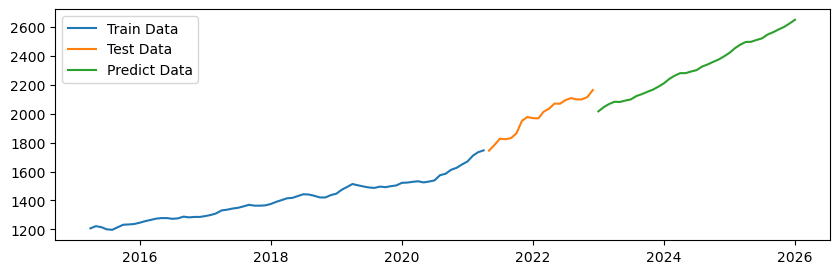

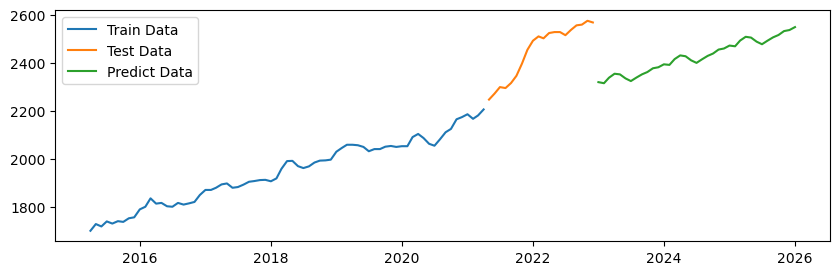

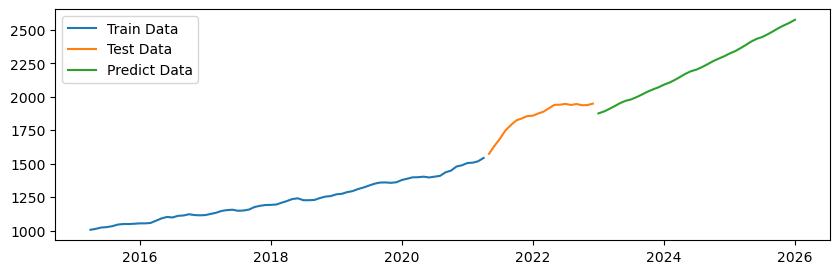

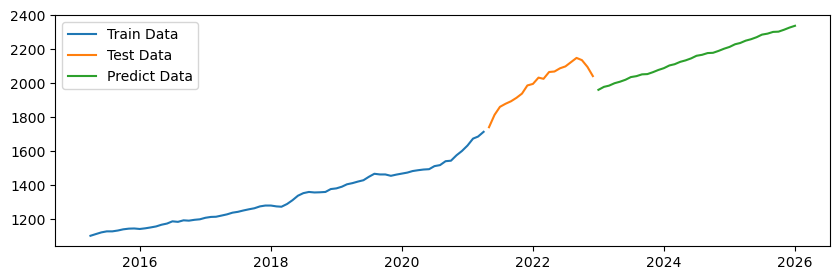

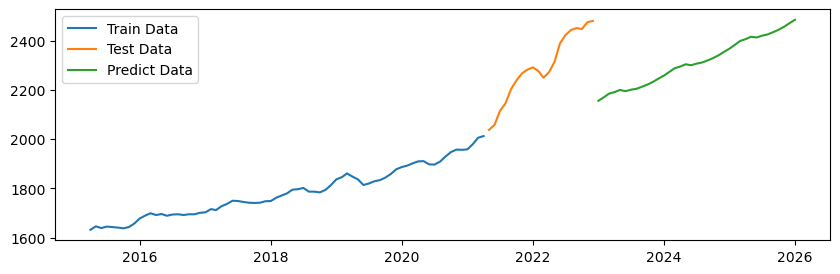

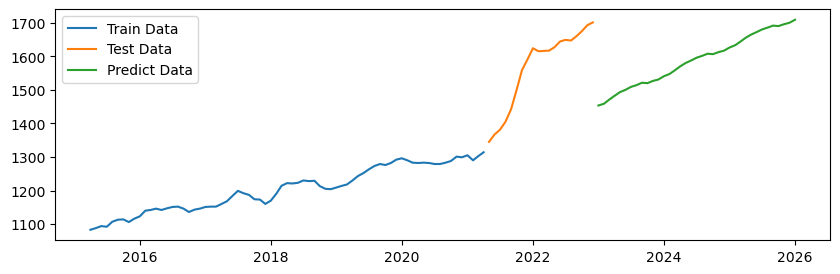

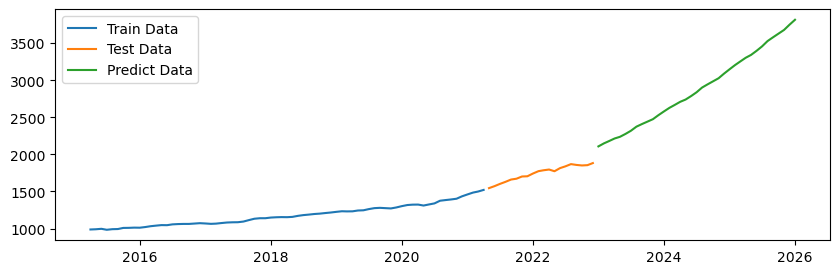

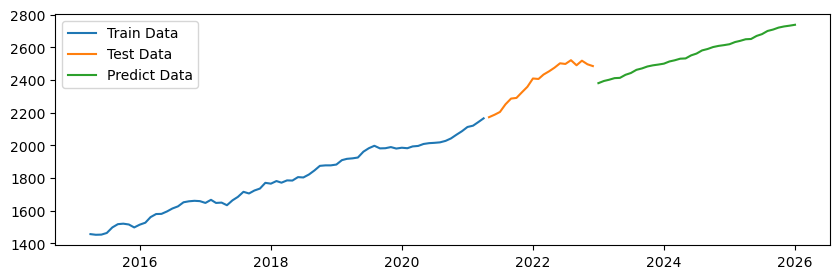

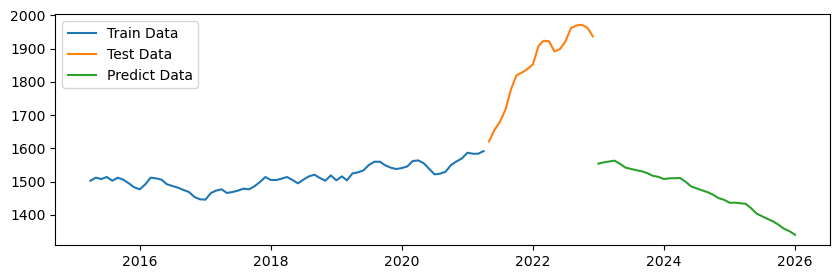

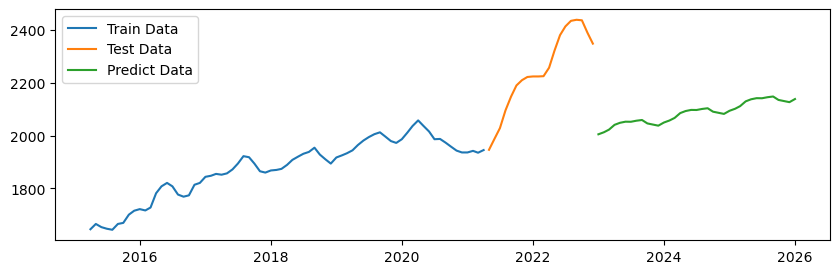

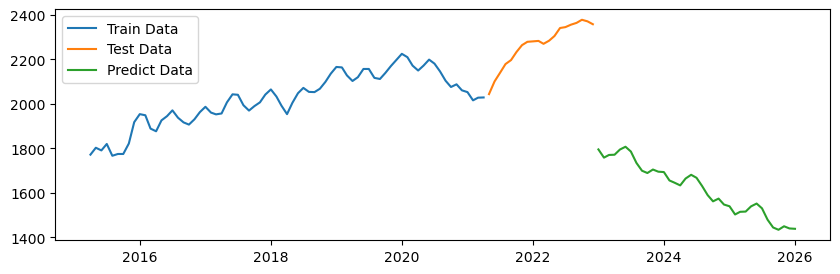

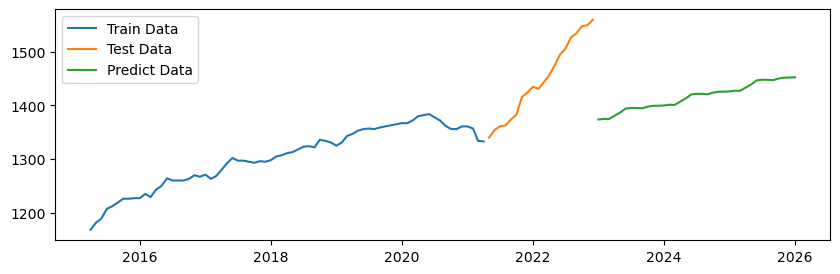

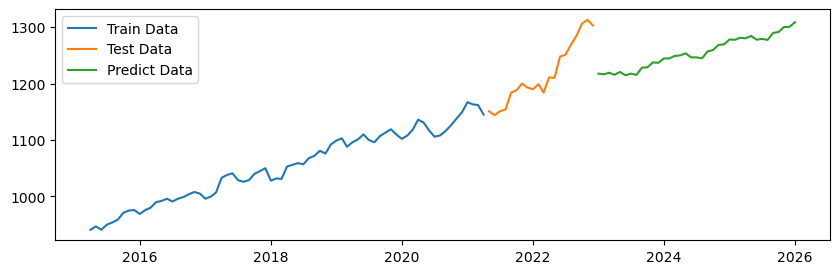

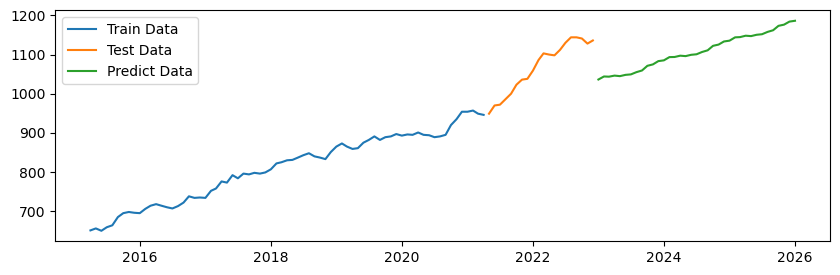

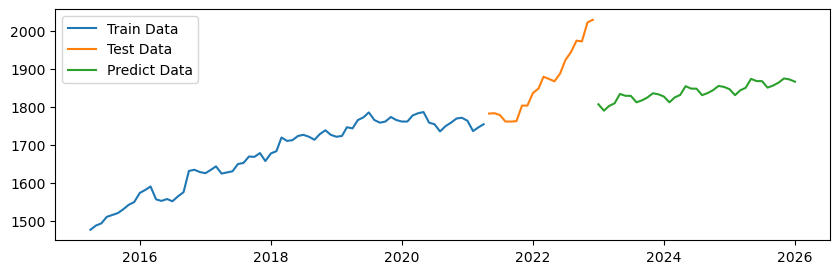

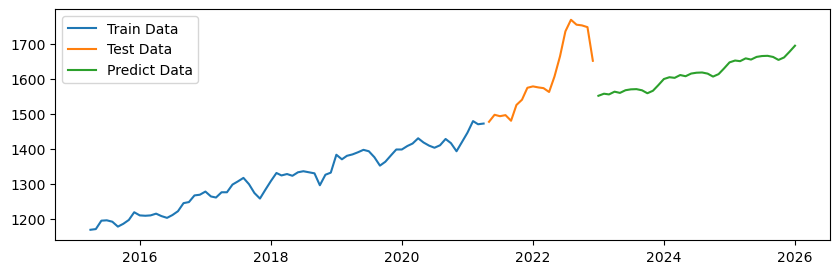

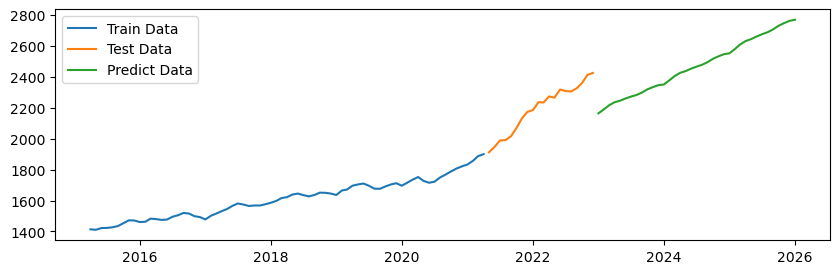

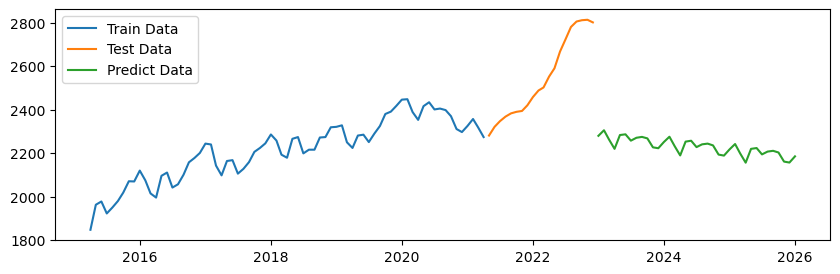

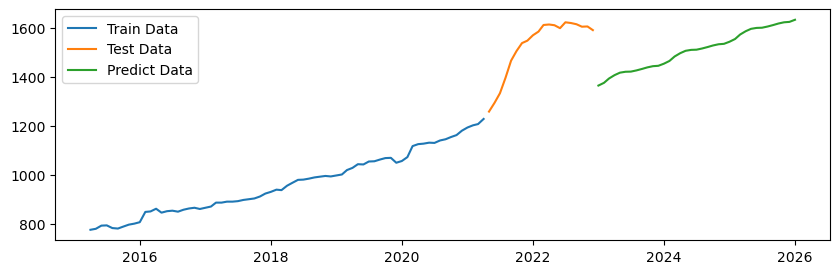

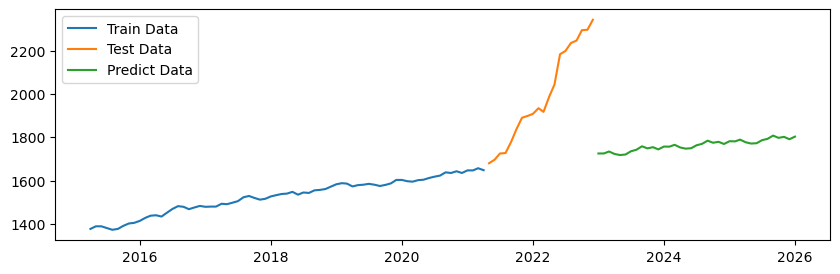

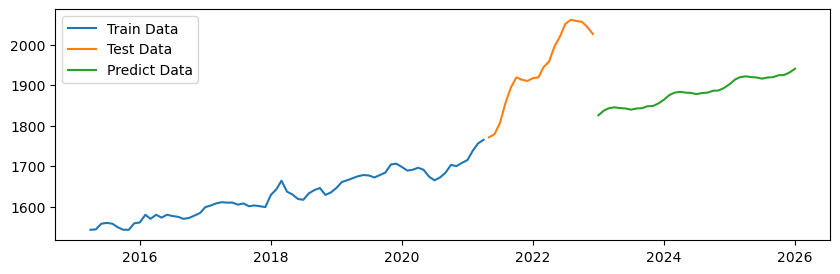

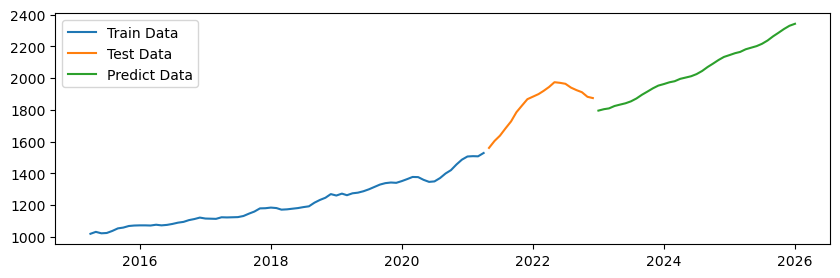

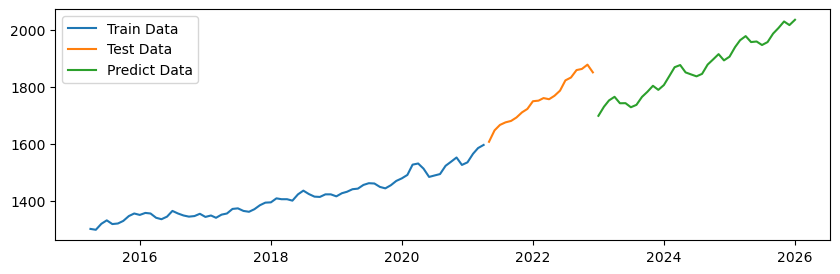

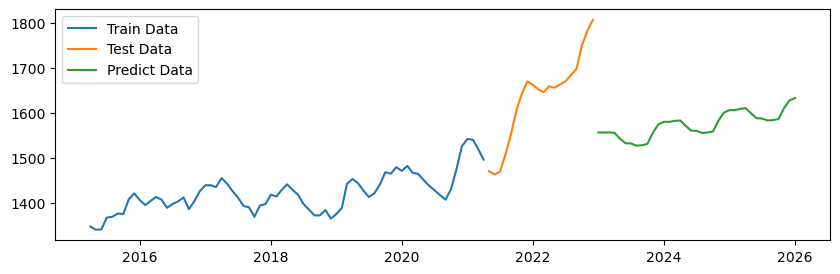

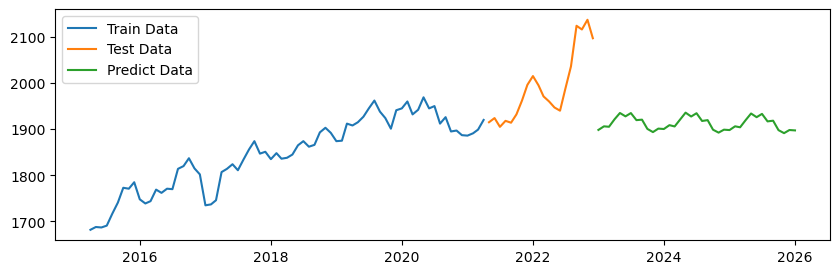

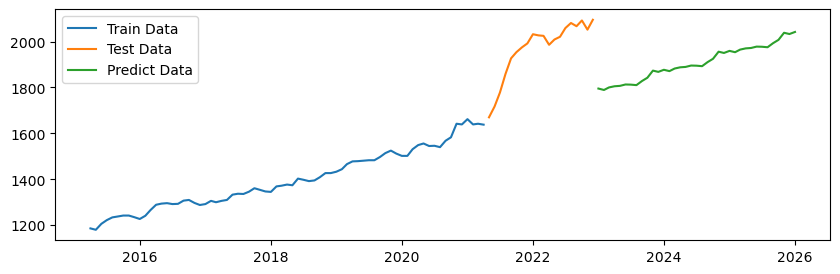

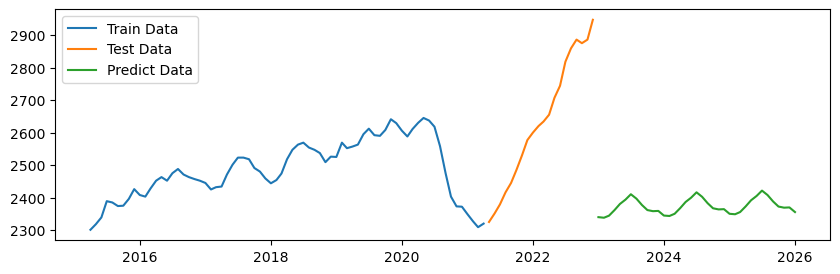

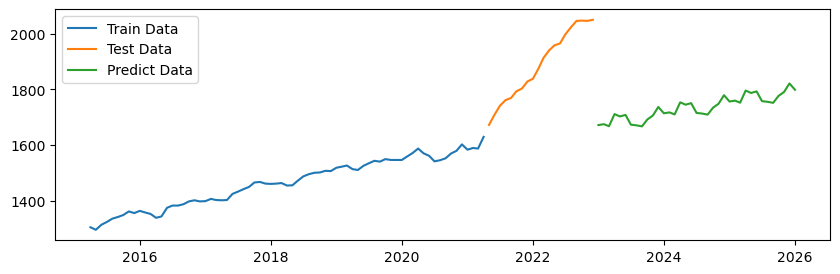

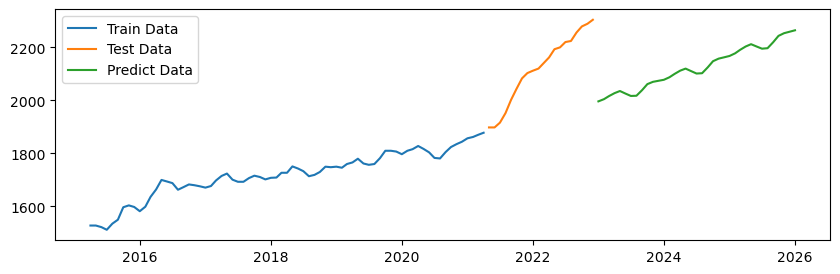

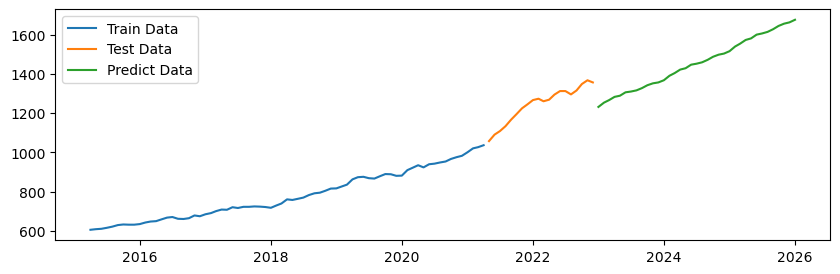

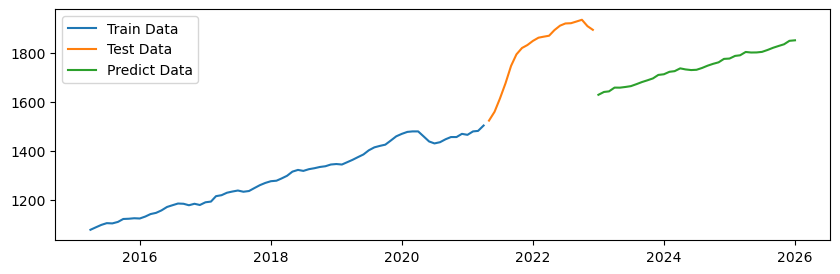

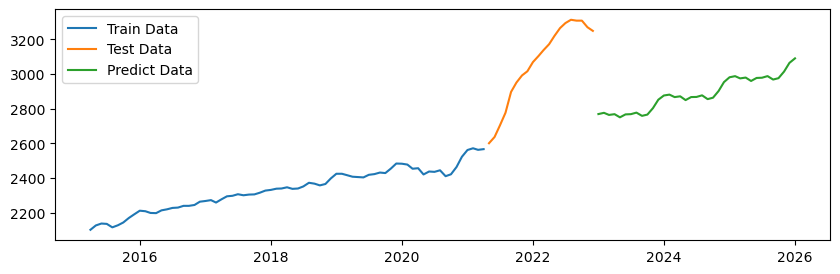

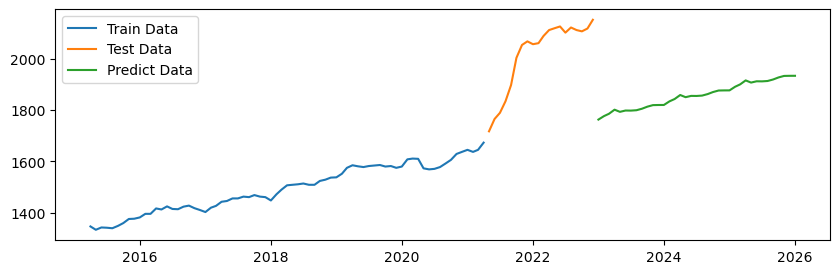

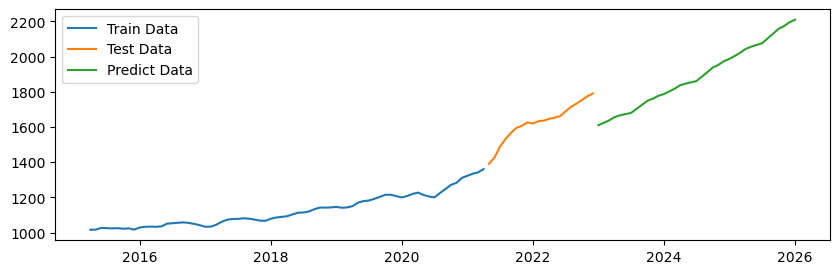

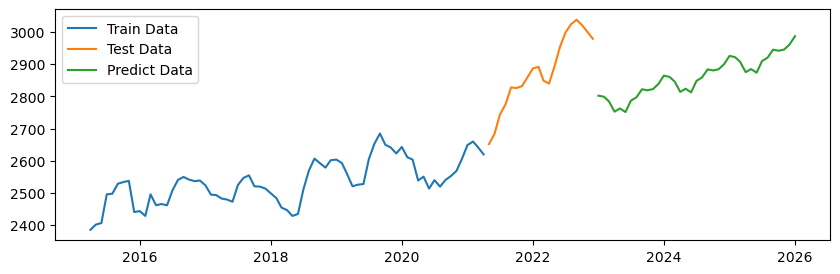

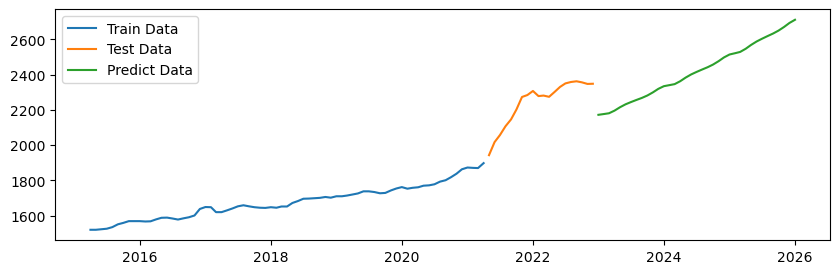

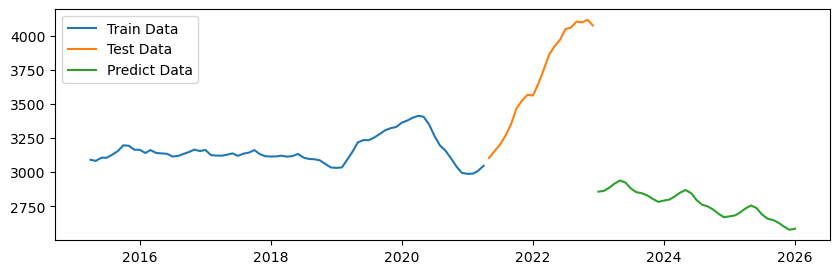

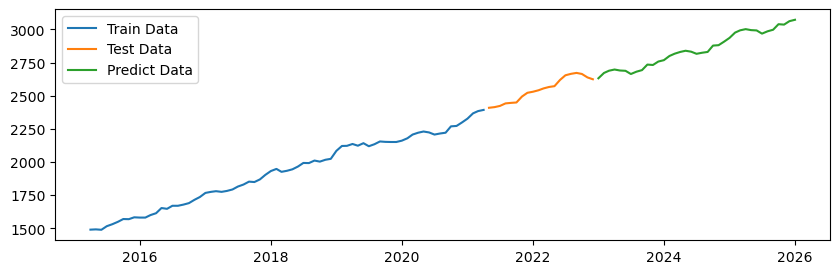

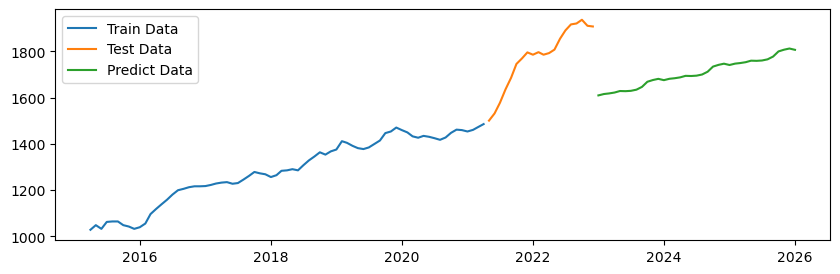

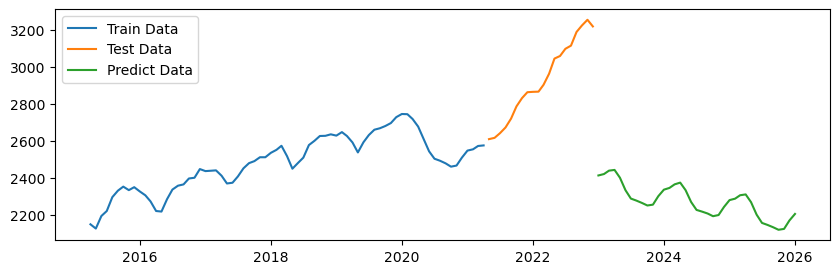

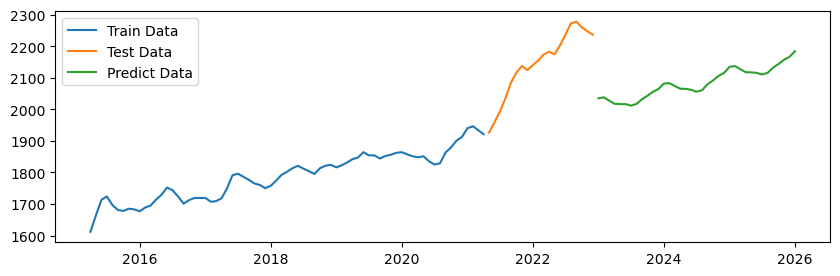

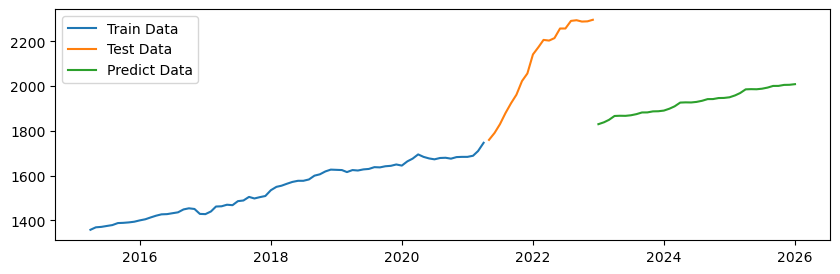

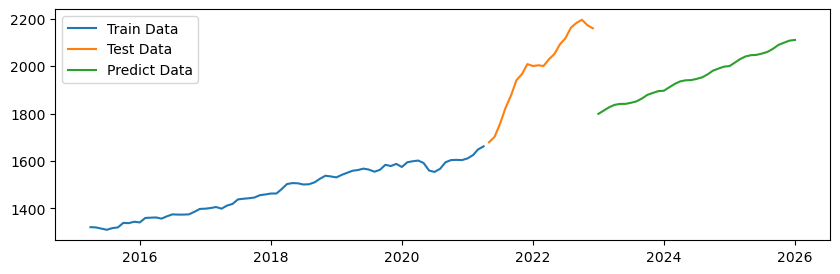

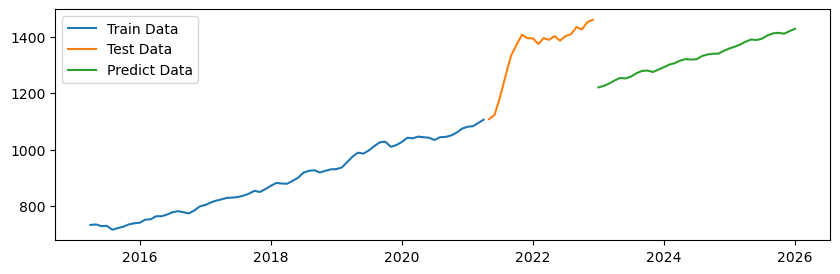

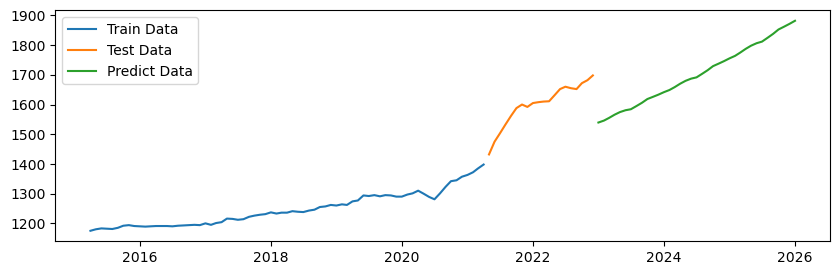

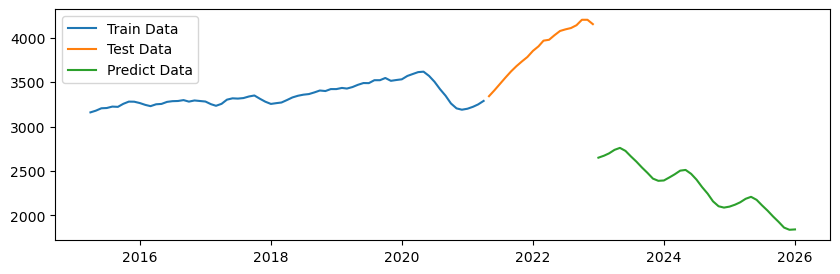

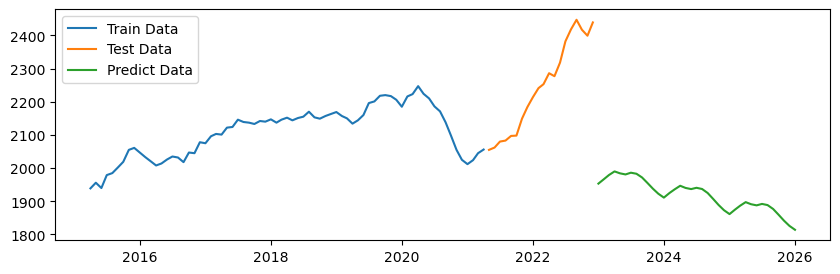

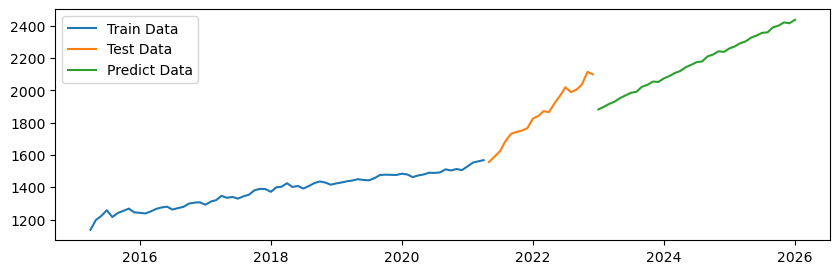

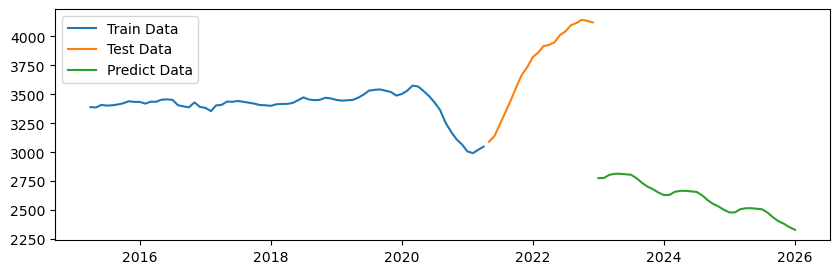

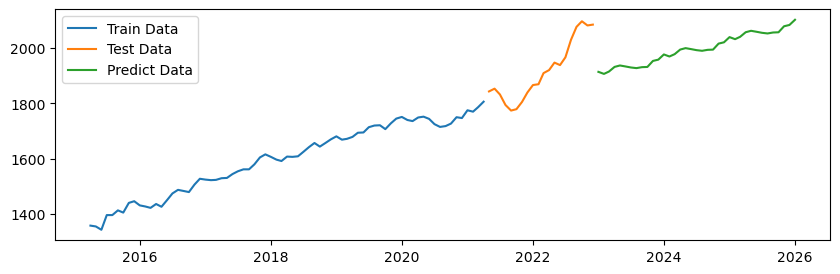

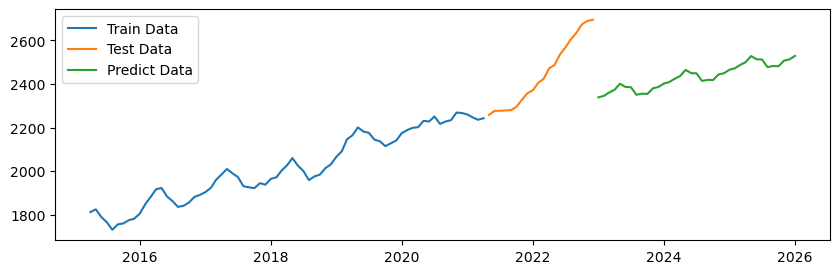

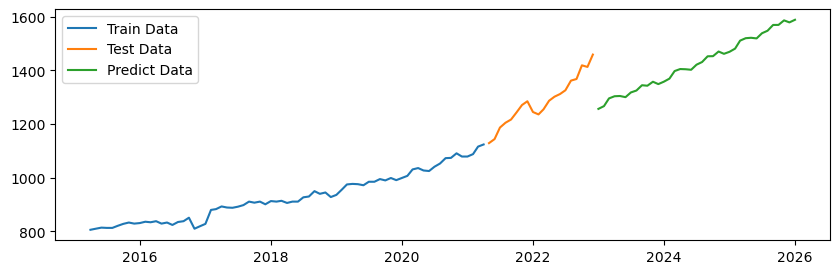

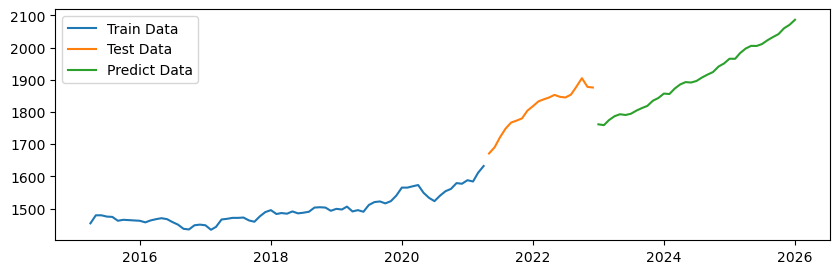

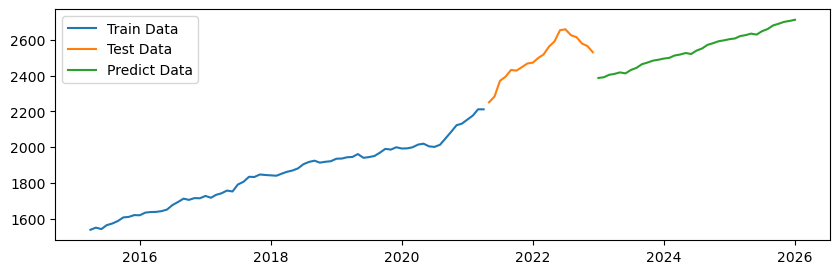

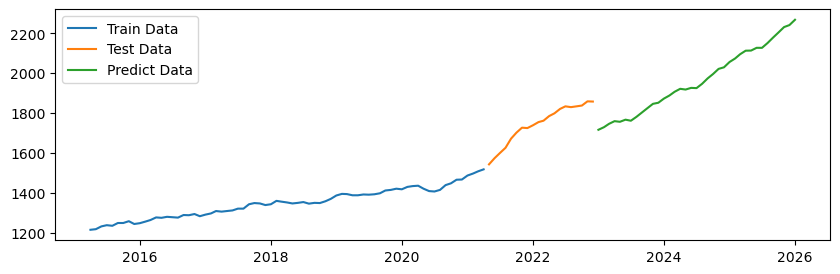

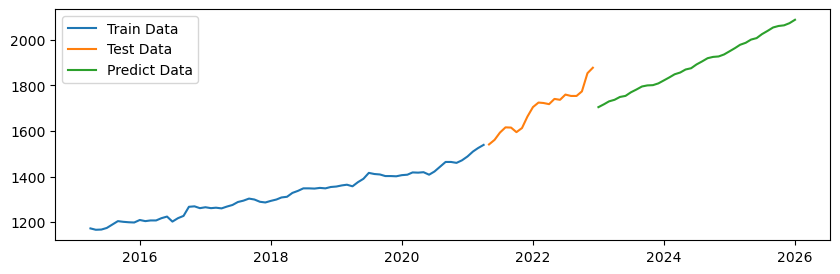

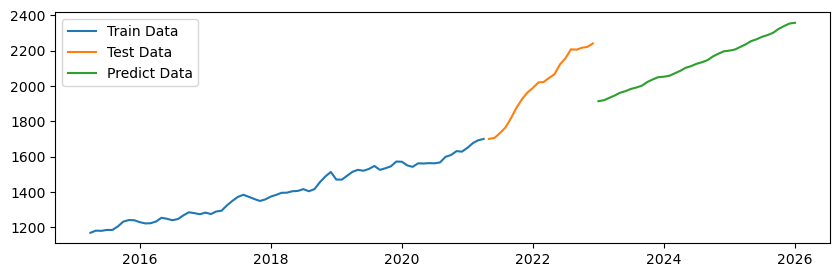

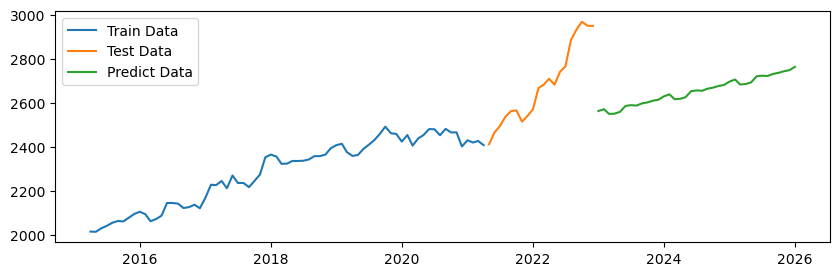

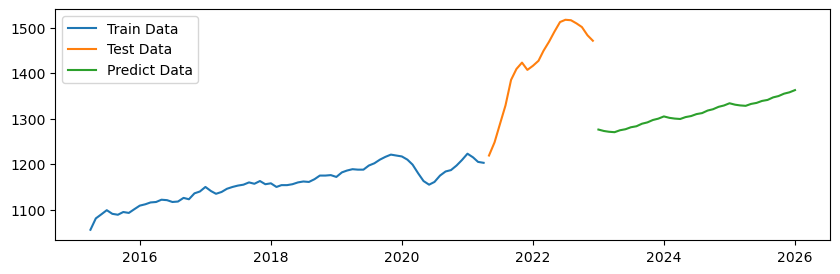

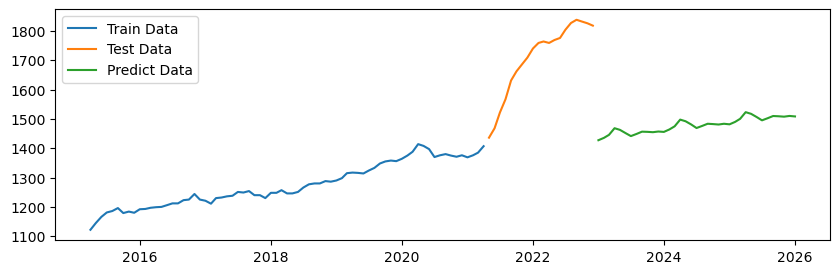

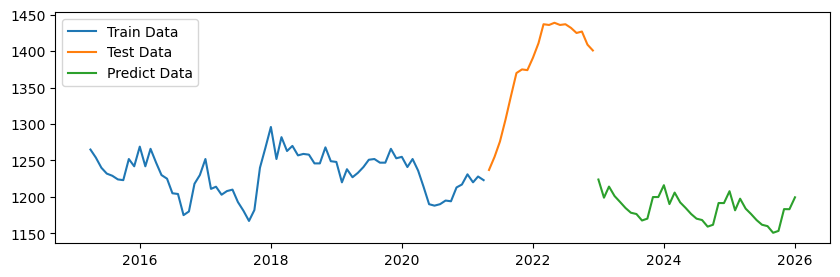

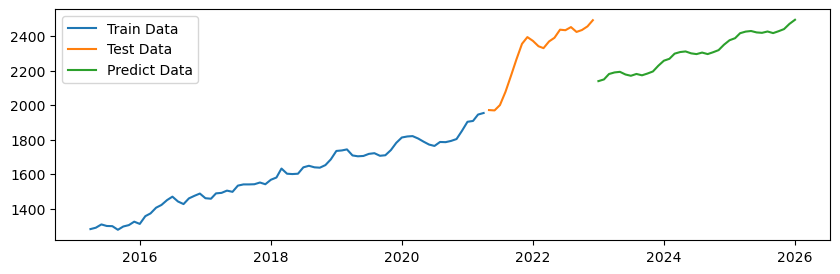

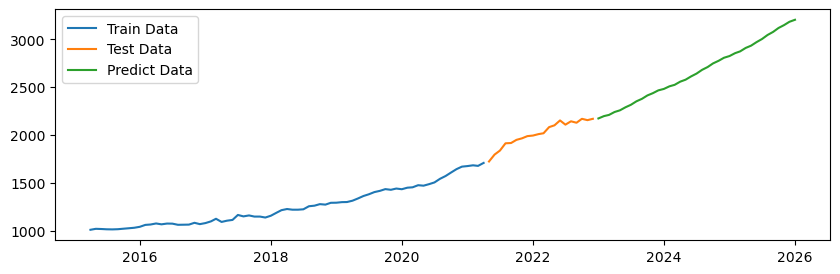

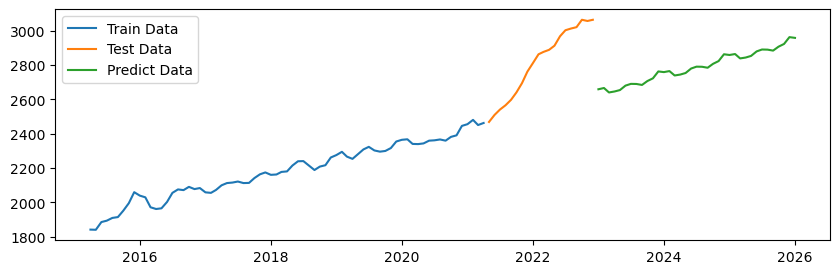

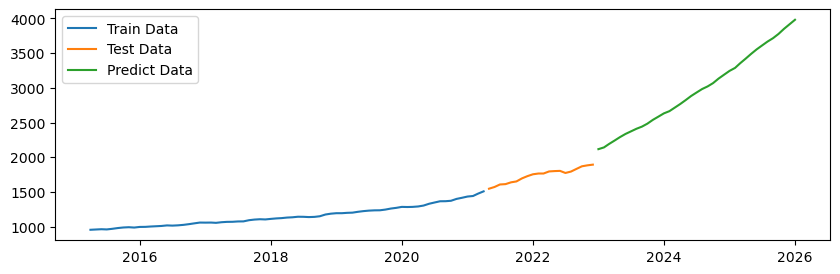

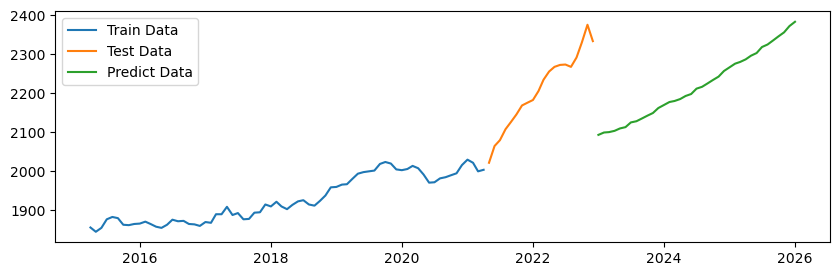

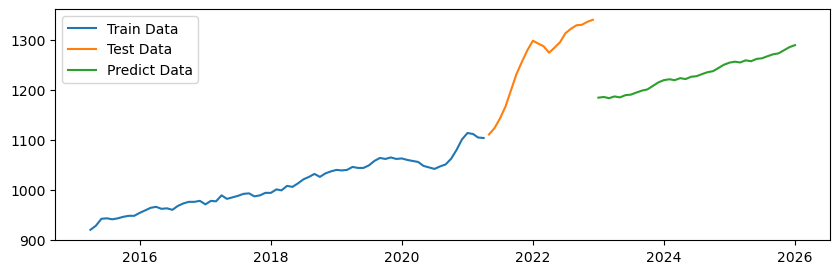

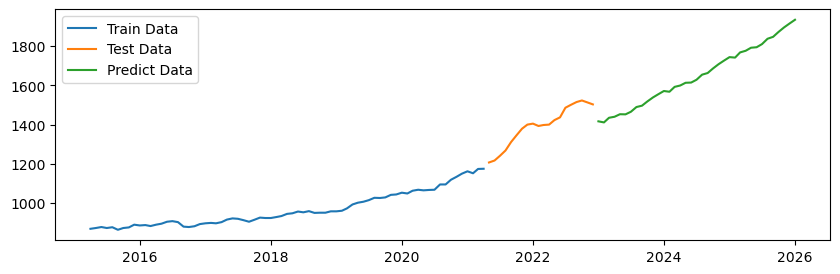

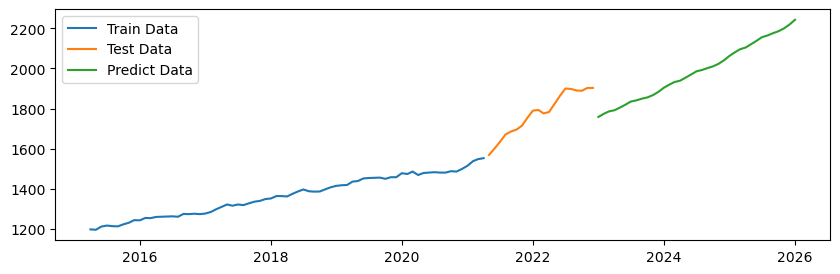

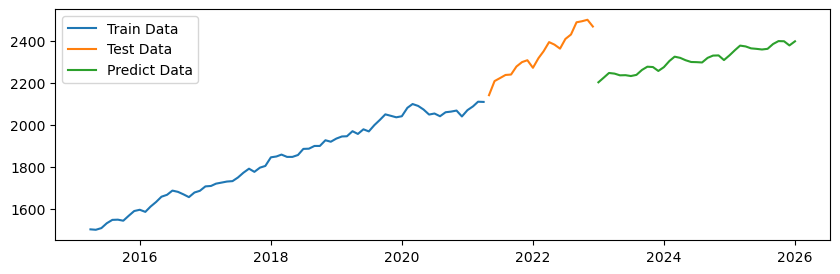

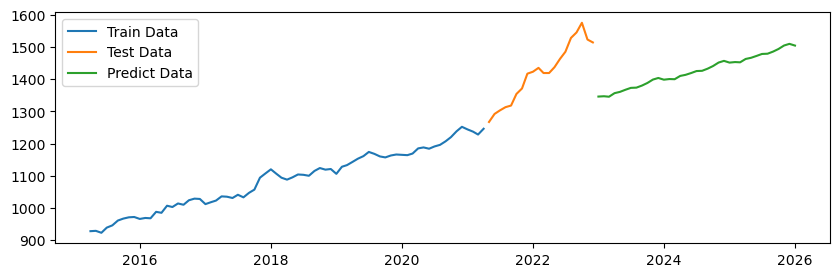

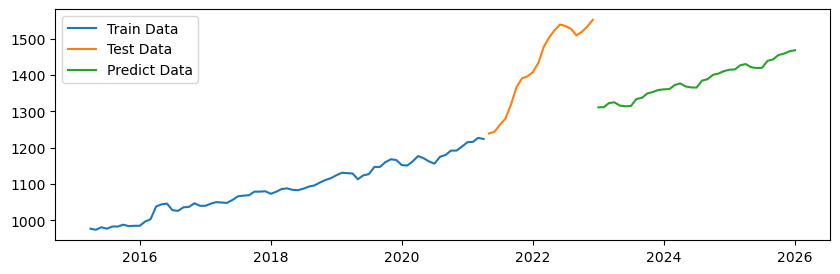

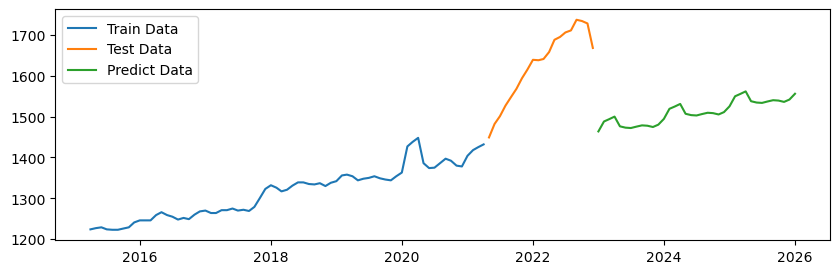

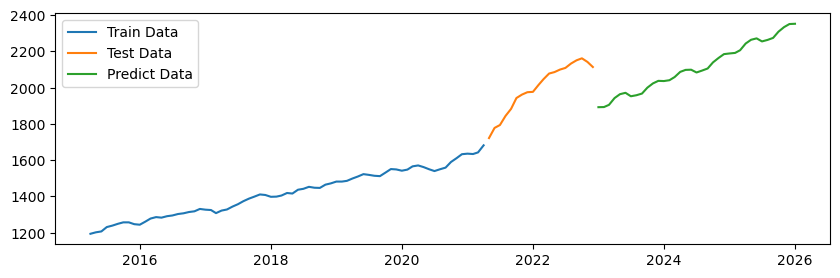

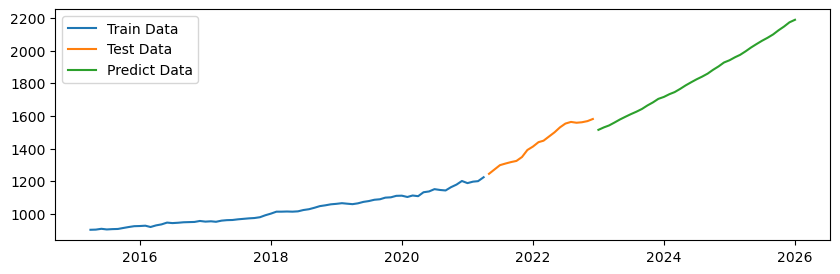

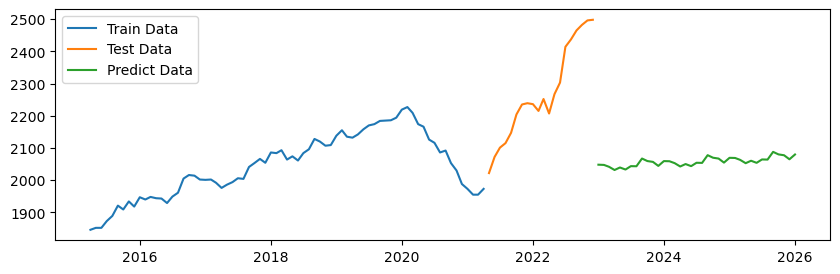

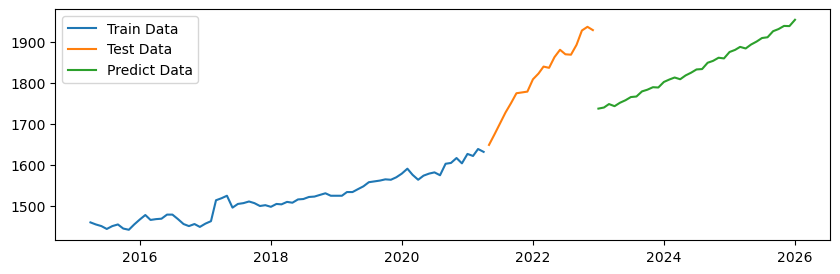

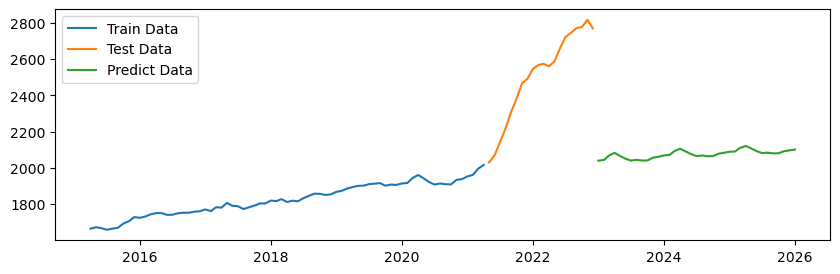

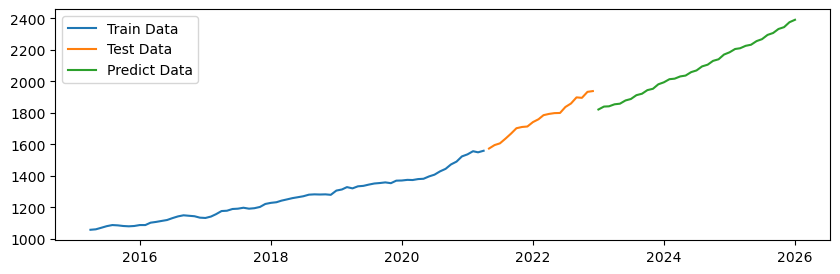

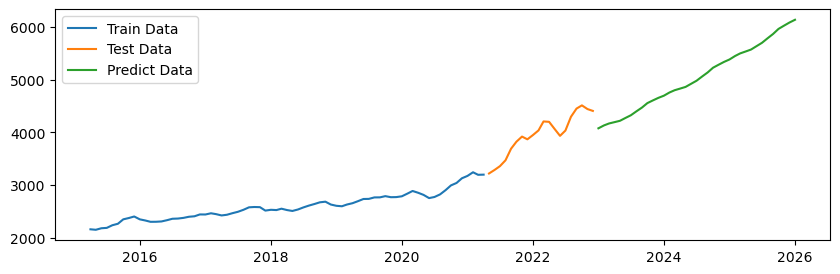

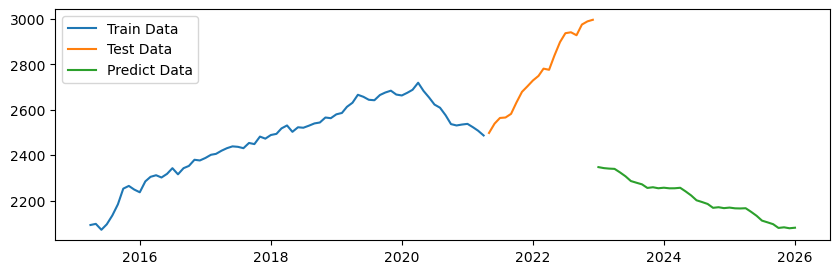

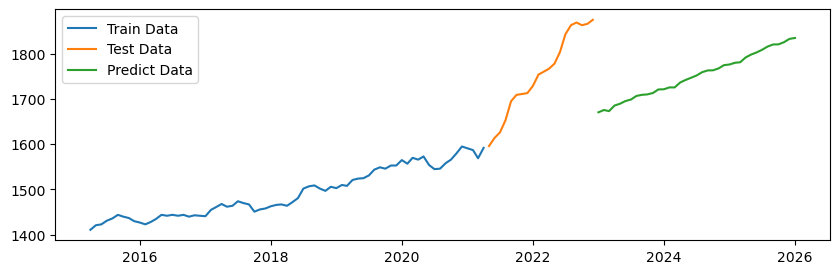

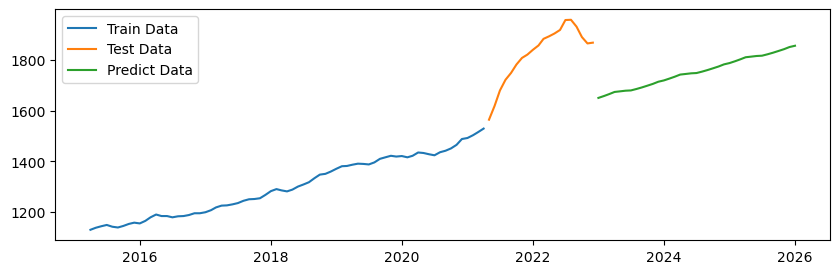

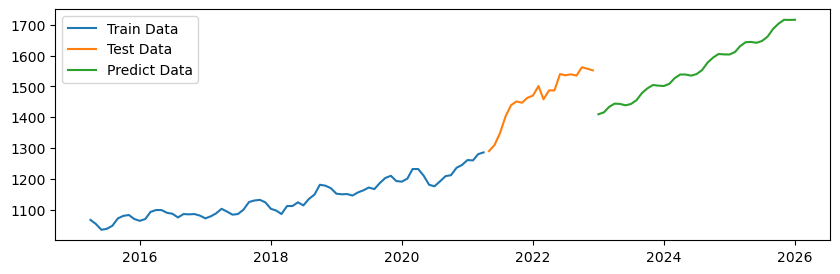

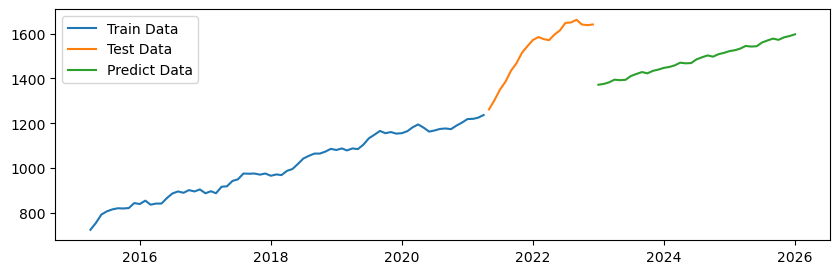

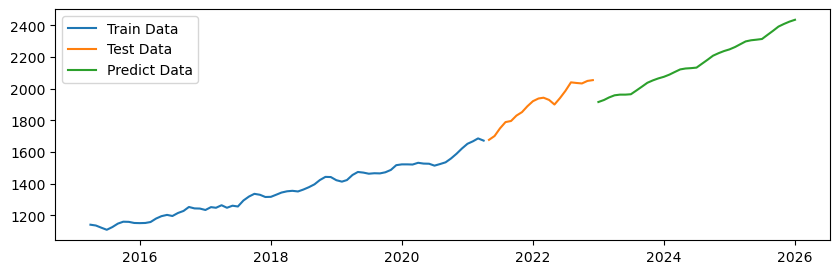

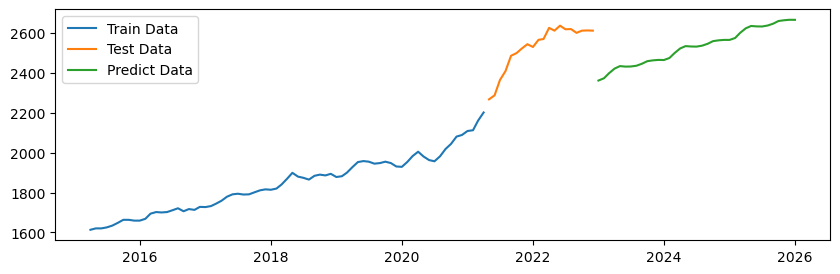

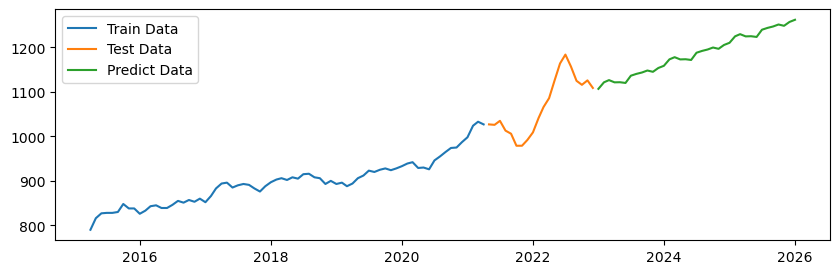

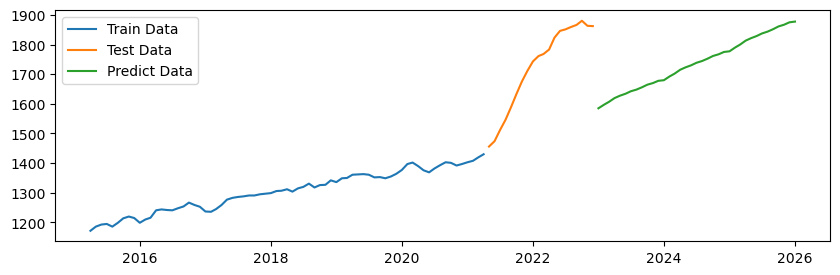

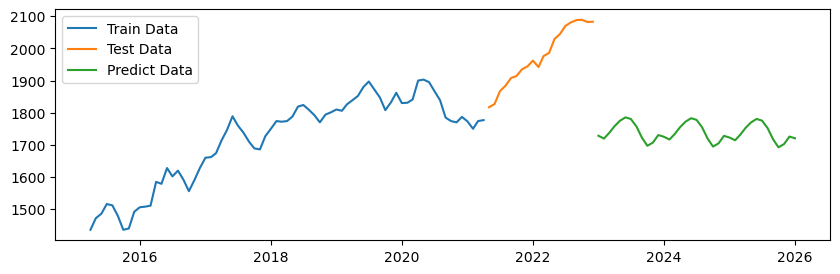

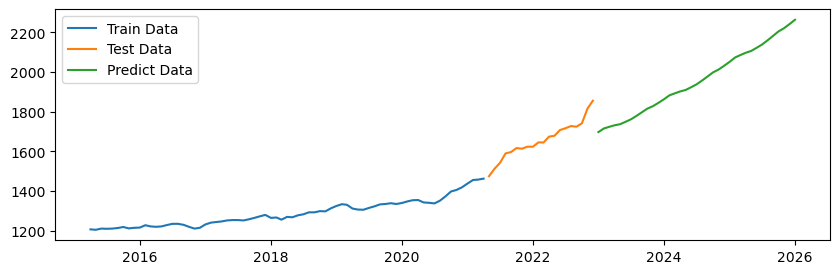

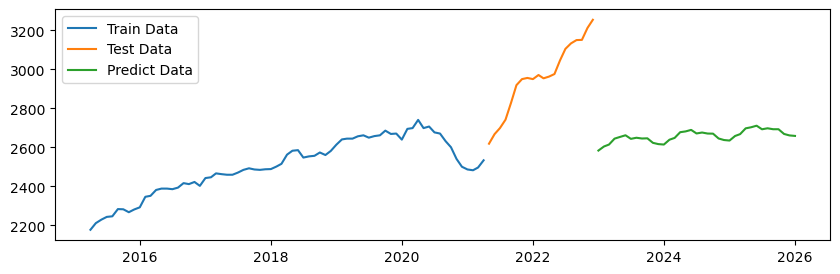

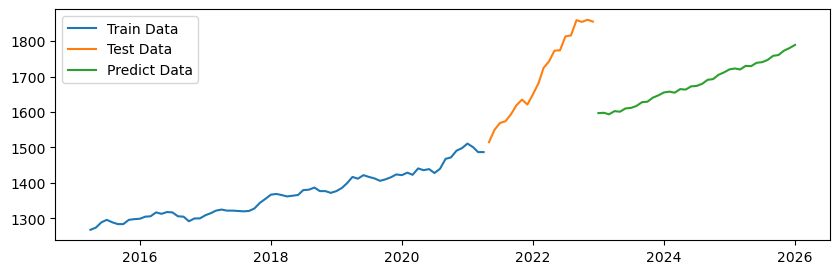

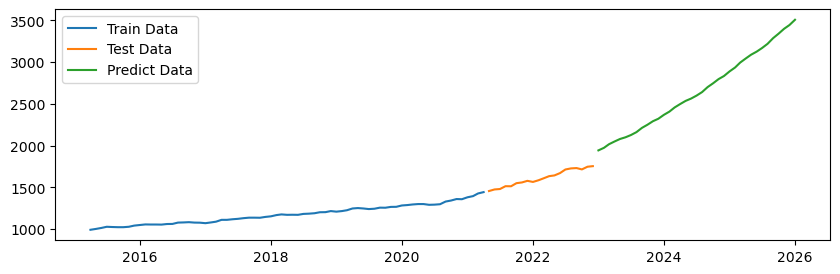

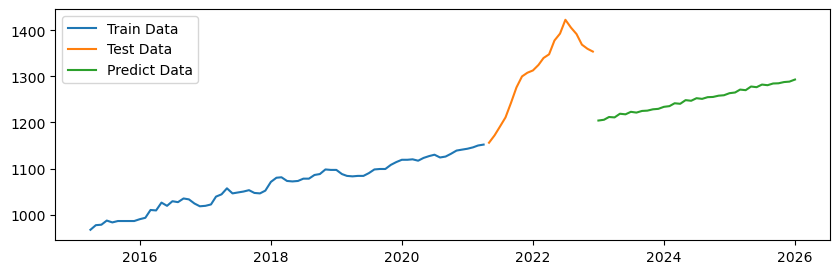

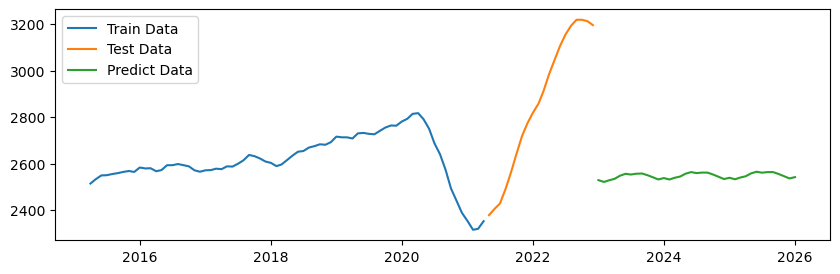

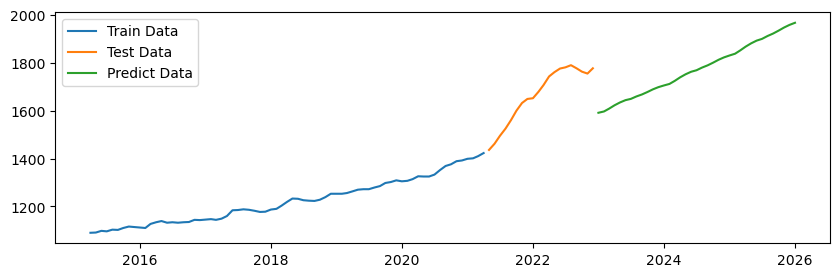

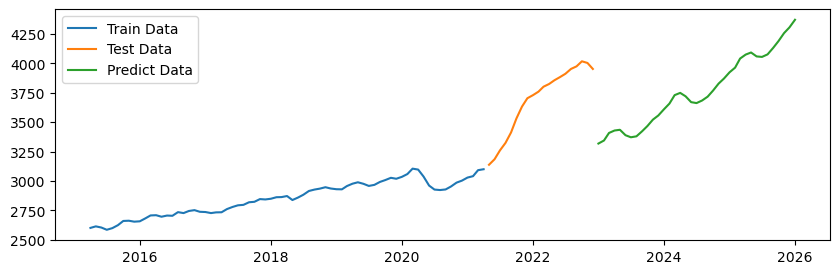

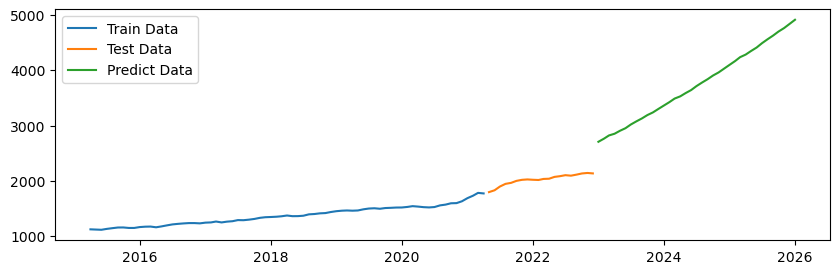

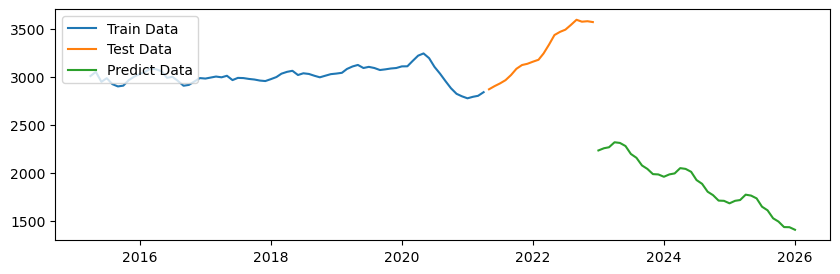

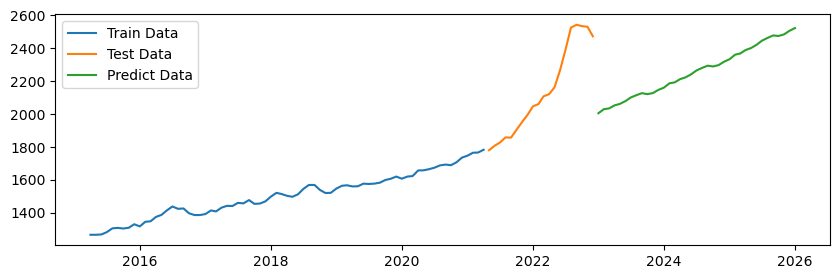

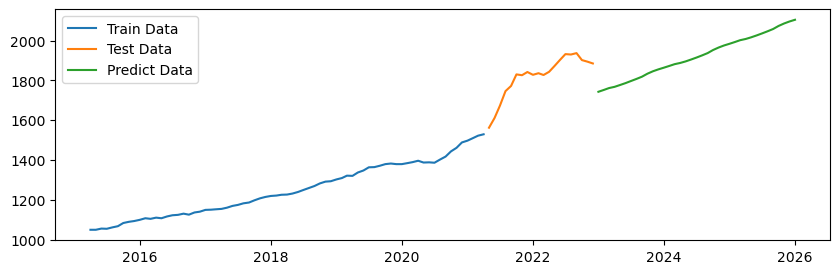

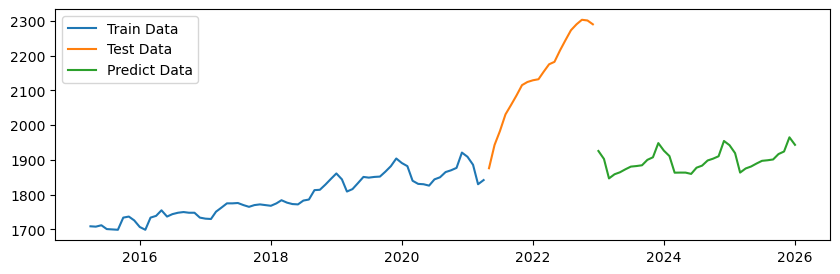

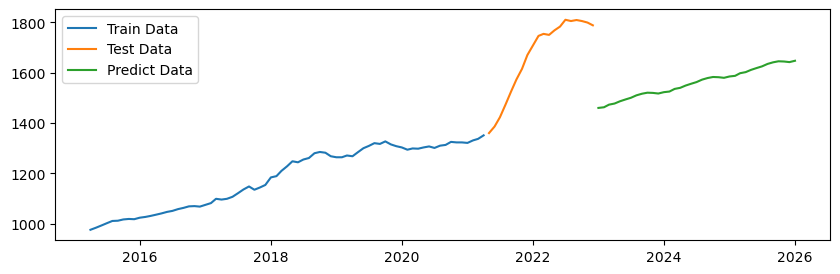

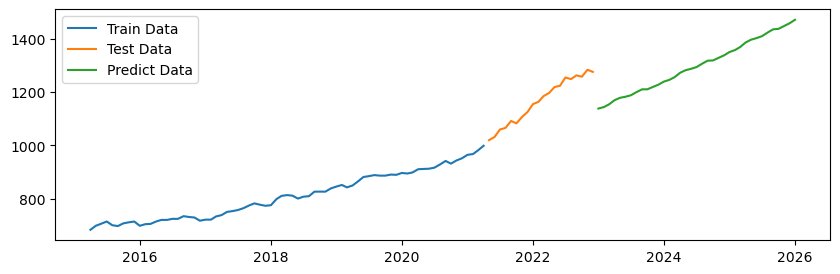

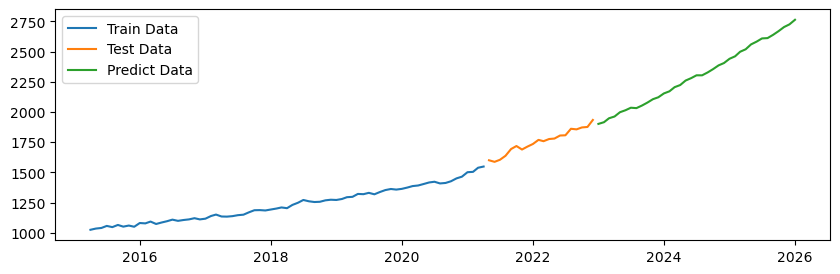

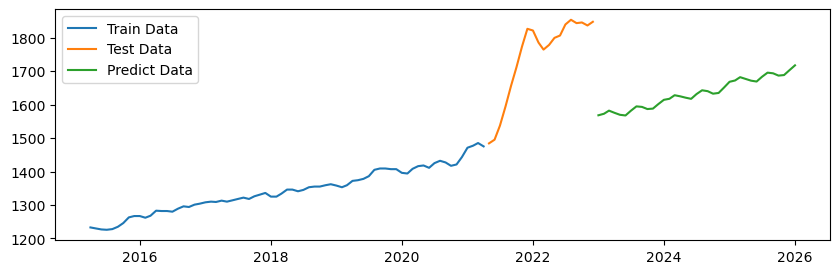

In [22]:
list_zip = df.columns
Best_model = {}
train_data = {}
test_data = {}
models = {}
df2  = pd.DataFrame()
for zip_code in list_zip:
    data = df[zip_code]
    train=data.iloc[:-20]
    test=data.iloc[-20:]
    stepwise_fit = auto_arima(data, trace=True,supress_warnings=True)
    best_order = stepwise_fit.get_params()["order"]
    #seasonal_order=stepwise_fit.get_params()['seasonal_order']
    model=SARIMAX(train,order = best_order, seasonal_order=(1,1,1,12))
    model=model.fit()
    models[zip_code] = model
    train_data[zip_code] = train
    test_data[zip_code] = test
    future_pred=models[zip_code].predict(start=93,end=93+36,type="levels")
    plt.figure(figsize=(10,3))
    plt.plot(train_data[zip_code].index, train_data[zip_code].values,label="Train Data" )
    plt.plot(test_data[zip_code].index, test_data[zip_code].values,label="Test Data"  )
    plt.plot(future_pred.index, future_pred.values,label="Predict Data"  )
    plt.legend( loc="upper left")
    start=len (train_data[zip_code])
    end=len(train_data[zip_code])+len(test_data[zip_code])-1
    pred=models[zip_code].predict(start=start,end=end,type="levels")
    rmse=sqrt(mean_squared_error(pred,test_data[zip_code]))
    print( f' For Zipcode {zip_code} RMSE Score is {int(rmse)}' )
    if int(rmse) < 250:
        plt.savefig(f'Images/{zip_code}_{int(rmse)}.jpg')
        pickle.dump(models[zip_code], open(f'Models/{zip_code}.pkl', 'wb'))
        pickled_model = pickle.load(open(f'Models/{zip_code}.pkl', 'rb'))
        #pred = pickled_model.predict(start=93,end=93+30,type="levels").rename("SARIMA PREDICTION")
        #print( f' For Zipcode {pred} RMSE Score is {(pred)}' )
        stodf = future_pred.to_frame().reset_index()
        stodf.rename(columns = {'predicted_mean':'FutureRent' , 'index':'month'},inplace=True)
        stodf = stodf.assign(zipcode=zip_code)
        columnsTitles = ['zipcode', 'month', 'FutureRent']
        stodf = stodf.reindex(columns=columnsTitles)
        v= stodf["zipcode"][1] # Takinf first value from list.
        df2["Date"] = stodf["month"]
        df2["ZipCode"] = stodf["FutureRent"]
        df2.rename(columns = {"ZipCode": v}, inplace = True)
        
        #print( f' For Zipcode {stodf} RMSE Score is {(stodf)}' )
        


In [23]:
df2.set_index("Date", inplace = True)
df3 = df2.round()
df3

77449   77494   77084   10467   90250   60618   94565   11220  \
Date                                                                         
2022-12-31  1748.0  1709.0  1447.0  2055.0  1796.0  1501.0  2609.0  2047.0   
2023-01-31  1767.0  1716.0  1462.0  2043.0  1810.0  1503.0  2636.0  2014.0   
2023-02-28  1782.0  1704.0  1463.0  2012.0  1824.0  1513.0  2663.0  2038.0   
2023-03-31  1797.0  1698.0  1457.0  2034.0  1833.0  1529.0  2687.0  2033.0   
2023-04-30  1813.0  1701.0  1453.0  2050.0  1832.0  1536.0  2694.0  2087.0   
2023-05-31  1821.0  1699.0  1457.0  2061.0  1826.0  1529.0  2687.0  2087.0   
2023-06-30  1832.0  1694.0  1460.0  2067.0  1828.0  1520.0  2693.0  2107.0   
2023-07-31  1844.0  1694.0  1455.0  2073.0  1838.0  1518.0  2708.0  2093.0   
2023-08-31  1862.0  1700.0  1457.0  2082.0  1853.0  1518.0  2732.0  2099.0   
2023-09-30  1879.0  1724.0  1467.0  2108.0  1860.0  1505.0  2750.0  2064.0   
2023-10-31  1894.0  1726.0  1472.0  2132.0  1865.0  1501.0  2752.0  2076.0   
2023-11-30  1912.0  1749.0  1473.0  2174.0  1877.0  1502.0  2747.0  2052.0   
2023-12-31  1935.0  1750.0  1477.0  2148.0  1890.0  1510.0  2743.0  2060.0   
2024-01-31  1955.0  1758.0  1492.0  2136.0  1905.0  1515.0  2770.0  2027.0   
2024-02-29  1973.0  1748.0  1493.0  2104.0  1920.0  1522.0  2797.0  2052.0   
2024-03-31  1992.0  1743.0  1487.0  2126.0  1929.0  1537.0  2821.0  2048.0   
2024-04-30  2010.0  1748.0  1482.0  2142.0  1928.0  1540.0  2828.0  2102.0   
2024-05-31  2019.0  1747.0  1487.0  2153.0  1923.0  1531.0  2821.0  2102.0   
2024-06-30  2033.0  1744.0  1490.0  2159.0  1924.0  1518.0  2827.0  2121.0   
2024-07-31  2048.0  1744.0  1485.0  2165.0  1934.0  1515.0  2842.0  2108.0   
2024-08-31  2070.0  1751.0  1487.0  2174.0  1949.0  1517.0  2866.0  2114.0   
2024-09-30  2089.0  1776.0  1497.0  2200.0  1957.0  1503.0  2883.0  2078.0   
2024-10-31  2107.0  1780.0  1502.0  2225.0  1961.0  1501.0  2886.0  2090.0   
2024-11-30  2128.0  1805.0  1503.0  2267.0  1973.0  1498.0  2881.0  2066.0   
2024-12-31  2154.0  1807.0  1507.0  2240.0  1985.0  1503.0  2877.0  2074.0   
2025-01-31  2178.0  1816.0  1522.0  2228.0  2001.0  1505.0  2904.0  2041.0   
2025-02-28  2199.0  1805.0  1523.0  2196.0  2016.0  1515.0  2931.0  2066.0   
2025-03-31  2220.0  1800.0  1517.0  2219.0  2025.0  1531.0  2955.0  2062.0   
2025-04-30  2241.0  1805.0  1512.0  2234.0  2024.0  1537.0  2962.0  2116.0   
2025-05-31  2254.0  1804.0  1517.0  2245.0  2019.0  1530.0  2955.0  2116.0   
2025-06-30  2270.0  1801.0  1520.0  2252.0  2020.0  1521.0  2961.0  2135.0   
2025-07-31  2288.0  1801.0  1515.0  2258.0  2030.0  1520.0  2976.0  2122.0   
2025-08-31  2312.0  1809.0  1517.0  2266.0  2045.0  1520.0  3000.0  2128.0   
2025-09-30  2334.0  1834.0  1527.0  2293.0  2053.0  1507.0  3017.0  2092.0   
2025-10-31  2355.0  1837.0  1532.0  2317.0  2057.0  1502.0  3020.0  2104.0   
2025-11-30  2380.0  1862.0  1533.0  2359.0  2069.0  1503.0  3015.0  2080.0   
2025-12-31  2408.0  1864.0  1537.0  2332.0  2082.0  1512.0  3010.0  2089.0   

             75052   77433  ...   75056   90004   23452   77375   28227  \
Date                        ...                                           
2022-12-31  1577.0  1720.0  ...  1585.0  1728.0  1698.0  1597.0  1944.0   
2023-01-31  1592.0  1730.0  ...  1597.0  1720.0  1716.0  1598.0  1975.0   
2023-02-28  1600.0  1729.0  ...  1607.0  1736.0  1724.0  1593.0  2018.0   
2023-03-31  1610.0  1733.0  ...  1619.0  1758.0  1732.0  1602.0  2050.0   
2023-04-30  1606.0  1731.0  ...  1627.0  1775.0  1737.0  1601.0  2080.0   
2023-05-31  1604.0  1745.0  ...  1634.0  1786.0  1749.0  1610.0  2101.0   
2023-06-30  1606.0  1749.0  ...  1642.0  1780.0  1762.0  1611.0  2127.0   
2023-07-31  1617.0  1752.0  ...  1648.0  1757.0  1779.0  1617.0  2162.0   
2023-08-31  1628.0  1751.0  ...  1656.0  1722.0  1798.0  1628.0  2214.0   
2023-09-30  1638.0  1754.0  ...  1665.0  1697.0  1816.0  1629.0  2250.0   
2023-10-31  1641.0  1767.0  ...  1670.0  1707.0  1828.0  1641.0  2293.

In [25]:
# Combining data frames
df_concat = pd.concat([df, df3], axis = 0)
df_concat2 = df_concat.dropna(axis= 1)
df_concat2

77449   77494   77084   10467   90250   60618   94565   11220  \
Date                                                                         
2015-03-31  1274.0  1583.0  1216.0  1309.0  1078.0  1304.0  1590.0  1645.0   
2015-04-30  1289.0  1578.0  1213.0  1311.0  1076.0  1321.0  1606.0  1716.0   
2015-05-31  1294.0  1583.0  1214.0  1330.0  1060.0  1323.0  1590.0  1727.0   
2015-06-30  1297.0  1581.0  1222.0  1356.0  1044.0  1354.0  1626.0  1790.0   
2015-07-31  1298.0  1582.0  1215.0  1372.0  1062.0  1359.0  1648.0  1792.0   
...            ...     ...     ...     ...     ...     ...     ...     ...   
2025-08-31  2312.0  1809.0  1517.0  2266.0  2045.0  1520.0  3000.0  2128.0   
2025-09-30  2334.0  1834.0  1527.0  2293.0  2053.0  1507.0  3017.0  2092.0   
2025-10-31  2355.0  1837.0  1532.0  2317.0  2057.0  1502.0  3020.0  2104.0   
2025-11-30  2380.0  1862.0  1533.0  2359.0  2069.0  1503.0  3015.0  2080.0   
2025-12-31  2408.0  1864.0  1537.0  2332.0  2082.0  1512.0  3010.0  2089.0   

             75052   77433  ...   75056   90004   23452   77375   28227  \
Date                        ...                                           
2015-03-31  1129.0  1377.0  ...  1172.0  1436.0  1207.0  1268.0   993.0   
2015-04-30  1124.0  1387.0  ...  1186.0  1472.0  1205.0  1274.0  1003.0   
2015-05-31  1116.0  1366.0  ...  1193.0  1486.0  1211.0  1289.0  1015.0   
2015-06-30  1122.0  1362.0  ...  1195.0  1516.0  1210.0  1296.0  1029.0   
2015-07-31  1130.0  1363.0  ...  1186.0  1512.0  1211.0  1289.0  1026.0   
...            ...     ...  ...     ...     ...     ...     ...     ...   
2025-08-31  1786.0  1918.0  ...  1852.0  1717.0  2183.0  1758.0  3288.0   
2025-09-30  1797.0  1921.0  ...  1861.0  1692.0  2205.0  1761.0  3341.0   
2025-10-31  1800.0  1936.0  ...  1867.0  1703.0  2222.0  1773.0  3400.0   
2025-11-30  1808.0  1948.0  ...  1875.0  1726.0  2242.0  1780.0  3445.0   
2025-12-31  1813.0  1965.0  ...  1877.0  1721.0  2264.0  1789.0  3508.0   

             78240   32218   89129   85705   30331  
Date                                                
2015-03-31   967.0  1090.0  1049.0   684.0  1024.0  
2015-04-30   977.0  1091.0  1049.0   699.0  1034.0  
2015-05-31   978.0  1098.0  1055.0   707.0  1039.0  
2015-06-30   987.0  1096.0  1054.0   715.0  1056.0  
2015-07-31   983.0  1103.0  1061.0   701.0  1046.0  
...            ...     ...     ...     ...     ...  
2025-08-31  1285.0  1922.0  2058.0  1436.0  2639.0  
2025-09-30  1285.0  1934.0  2073.0  1437.0  2670.0  
2025-10-31  1288.0  1947.0  2086.0  1448.0  2704.0  
2025-11-30  1289.0  1958.0  2096.0  1458.0  2726.0  
2025-12-31  1293.0  1967.0  2105.0  1471.0  2764.0  

[130 rows x 134 columns]

In [26]:
# Storing the data to csv 
file = df_concat2.to_csv("Resources//Data//ALL_ZipCode.csv")